In [ ]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import random
import datetime
import csv
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import matplotlib.dates as mdates

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 구글 드라이브에서 파일 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#df_click_stream_new_ori = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/click_stream_new.csv')

In [ ]:
#df_click_stream_new_ori.to_parquet('df_click_stream_new.parquet', compression='gzip')

In [ ]:
#df = pd.read_parquet('df_click_stream_new.parquet')

In [ ]:
df_click_stream_new_ori = pd.read_parquet('/content/gdrive/MyDrive/Sprint/Section6_Project2/df_click_stream_new.parquet')

클릭 스트림 데이터는 사용자의 온라인 상호 작용을 기록하고 분석하는 데 사용됩니다. 웹사이트나 앱에서 사용자의 동작과 행동을 이해하고, 이를 통해 사용자 경험을 개선하거나 마케팅 전략을 수립할 수 있습니다. 이 데이터는 사용자의 경로를 추적하여 어떤 페이지나 기능이 가장 많이 클릭되는지, 어떤 제품이 인기 있는지, 프로모션 코드가 어떤 영향을 미치는지 등을 파악하는 데 활용됩니다.

session_id: 사용자 세션 식별자. 사용자가 웹사이트 또는 앱에서 일련의 상호 작용을 수행하는 동안 생성되는 고유한 세션을 식별하는 값입니다.

event_name: 발생한 이벤트의 이름. 사용자 활동을 설명하는 이벤트의 유형을 나타냅니다. 예를 들어 '클릭', '구매', '검색' 등이 될 수 있습니다.

event_time: 이벤트가 발생한 시간. 일반적으로 날짜와 시간 정보를 포함하며, 사용자 활동의 타임스탬프를 나타냅니다.

event_id: 이벤트의 고유 식별자. 각각의 이벤트를 고유하게 식별하기 위한 값입니다.

traffic_source: 트래픽 소스. 사용자가 사이트에 도달하는 원본을 나타냅니다. 예를 들어 '직접', '검색 엔진', '소셜 미디어' 등이 될 수 있습니다.

product_id: 제품의 고유 식별자. 제품을 식별하는 값으로, 제품과 관련된 이벤트에서 사용될 수 있습니다.

quantity: 제품 수량. 이벤트에서 구매한 제품의 수량을 나타냅니다.

item_price: 제품 가격. 제품의 가격 정보를 나타냅니다.

payment_status: 결제 상태. 구매 이벤트의 경우 결제가 완료되었는지 여부를 나타냅니다.

search_keywords: 검색 키워드. 사용자가 검색한 키워드나 검색 관련 활동에서 사용되는 키워드를 나타냅니다.

promo_code: 프로모션 코드. 사용자가 입력한 프로모션 코드나 할인 코드를 나타냅니다.

promo_amount: 프로모션 할인 금액. 프로모션 코드로 인해 발생한 할인 금액을 나타냅니다.

In [ ]:
df_click_stream_new_ori

session_id   event_name  \
0         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   
1         fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   
2         7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   
3         7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   
4         7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   
...                                        ...          ...   
12833597  ad1063b0-a6e5-40a9-aed6-d1b45741e571       SEARCH   
12833598  64585e37-3fe7-48d7-b79b-ebcb70230eb2     HOMEPAGE   
12833599  64585e37-3fe7-48d7-b79b-ebcb70230eb2  ADD_TO_CART   
12833600  64585e37-3fe7-48d7-b79b-ebcb70230eb2      BOOKING   
12833601  64585e37-3fe7-48d7-b79b-ebcb70230eb2       SEARCH   

                           event_time                              event_id  \
0         2019-09-06T15:54:32.821085Z  9c4388c4-c95b-4678-b5ca-e9cbc0734109   
1         2019-09-06T16:03:57.821085Z  4690e1f5-3f99-42d3-84a5-22c4c4d8500a   
2         2019-09-01T12:05:10.322763Z  88aeaeb5-ec98-4859-852c-8abb483faf31   
3         2019-09-01T12:06:33.322763Z  934e306e-ecc6-472f-9ccb-12c8536910a2   
4         2019-09-01T12:15:29.425431Z  9f4767a1-40fa-4c9c-9524-dfad18634d56   
...                               ...                                   ...   
12833597  2021-06-07T04:37:53.354381Z  4b3b91a5-9bda-44de-87dc-153367071dfc   
12833598  2021-05-05T11:44:14.985835Z  ab0acc87-9578-408a-b47f-c46996b8b52f   
12833599  2021-05-05T11:53:10.985835Z  230d7b67-9934-42f9-9509-b330ac6ae777   
12833600  2021-05-05T12:10:09.135142Z  8996ce49-c5dd-41ed-9231-28bfdb634cbe   
12833601  2021-05-05T11:53:12.985835Z  3c60d8bc-b3e1-41fa-a87b-f65a9053856a   

         traffic_source  product_id  quantity  item_price payment_status  \
0                MOBILE         NaN       NaN         NaN           None   
1                MOBILE         NaN       NaN         NaN           None   
2                MOBILE         NaN       NaN         NaN           None   
3                MOBILE     15315.0       4.0    313529.0           None   
4                MOBILE         NaN       NaN         NaN        Success   
...                 ...         ...       ...         ...            ...   
12833597         MOBILE         NaN       NaN         NaN           None   
12833598         MOBILE         NaN       NaN         NaN           None   
12833599         MOBILE     19820.0       1.0     88918.0           None   
12833600         MOBILE         NaN       NaN         NaN        Success   
12833601         MOBILE         NaN       NaN         NaN           None   

         search_keywords promo_code  promo_amount  
0                   None       None           NaN  
1                   None       None           NaN  
2                   None       None           NaN  
3                   None       None           NaN  
4                   None       None           NaN  
...                  ...        ...           ...  
12833597           Bekas       None           NaN  
12833598            None       None           NaN  
12833599            None       None           NaN  
12833600            None       None           NaN  
12833601            Baju       None           NaN  

[12833602 rows x 12 columns]

* 구매한 고객들 데이터

In [ ]:
# ADD_TO_CART 이벤트만 있는 경우의 데이터 추출
add_to_cart_events = df_click_stream_new_ori[df_click_stream_new_ori['event_name'] == 'ADD_TO_CART']
booking_events = df_click_stream_new_ori[df_click_stream_new_ori['event_name'] == 'BOOKING']

# ADD_TO_CART 이벤트만 있는 경우 중에서 BOOKING 이벤트가 있는 경우만 추출
rfm_df_click_stream = add_to_cart_events[add_to_cart_events['session_id'].isin(booking_events['session_id'])]

# 필요한 열만 선택 (product_id, quantity, item_price 등)
rfm_df_click_stream = rfm_df_click_stream[['session_id', 'event_time', 'product_id', 'quantity', 'item_price', 'promo_code',	'promo_amount']]

In [ ]:
non_empty_promo = df_click_stream_new_ori[(df_click_stream_new_ori['promo_code'].notnull()) & (df_click_stream_new_ori['promo_amount'].notnull())]
non_empty_promo

session_id event_name  \
20        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2  ADD_PROMO   
46        d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9  ADD_PROMO   
53        98e66f53-f24f-4238-8c9c-34a0482e22d5  ADD_PROMO   
74        1553b735-081d-4dc5-8d5f-80c1bf442e0f  ADD_PROMO   
169       a1027501-f085-479f-a719-1aeec041408c  ADD_PROMO   
...                                        ...        ...   
12832905  cebfe9cd-0754-4151-9ba7-2372164686b7  ADD_PROMO   
12832915  5e7c20e3-e1f0-42ae-9016-b3227169dea9  ADD_PROMO   
12832967  eef8cec1-9dc6-4756-a4bc-0832da4b6e69  ADD_PROMO   
12833104  137b5f97-a8d0-4898-ac99-12cbbfc52362  ADD_PROMO   
12833120  1c2d6c6a-e1b8-4126-9f5d-082738e87b21  ADD_PROMO   

                           event_time                              event_id  \
20        2019-09-09T07:22:05.425431Z  28329764-aa29-4e7a-9d8e-eee88d00a640   
46        2019-09-24T16:16:10.425431Z  7a808081-2384-4a3a-ad00-9f10df4f07a7   
53        2019-10-02T15:14:18.425431Z  1d293181-b1cf-46e0-b5eb-682fe652131d   
74        2019-10-16T20:20:14.425431Z  c86b2a91-0a21-404a-98e9-947d3060fdc2   
169       2019-11-20T03:28:12.425431Z  cef2a298-e38b-4460-bc89-71f7a3039ff7   
...                               ...                                   ...   
12832905  2020-04-05T10:24:17.116768Z  a5ecd91b-ed11-4c8b-adf7-bab2720bc3c6   
12832915  2018-06-03T08:00:35.938975Z  487307cd-222a-4131-bc6a-69effe9f6560   
12832967  2021-07-25T08:23:48.795552Z  7fd98dbb-ed1a-4a5e-998f-d09566a67de0   
12833104  2021-11-18T17:57:33.345950Z  9abcf7c9-41e3-497e-974f-174a27161d2b   
12833120  2021-09-17T14:34:55.708206Z  4dc8868d-509a-4c02-b86d-95331c7e4be7   

         traffic_source  product_id  quantity  item_price payment_status  \
20               MOBILE         NaN       NaN         NaN           None   
46                  WEB         NaN       NaN         NaN           None   
53               MOBILE         NaN       NaN         NaN           None   
74               MOBILE         NaN       NaN         NaN           None   
169              MOBILE         NaN       NaN         NaN           None   
...                 ...         ...       ...         ...            ...   
12832905         MOBILE         NaN       NaN         NaN           None   
12832915         MOBILE         NaN       NaN         NaN           None   
12832967         MOBILE         NaN       NaN         NaN           None   
12833104         MOBILE         NaN       NaN         NaN           None   
12833120         MOBILE         NaN       NaN         NaN           None   

         search_keywords     promo_code  promo_amount  
20                  None         AZ2022        7047.0  
46                  None        BUYMORE        4903.0  
53                  None         AZ2022        6307.0  
74                  None    WEEKENDSERU        5165.0  
169                 None         XX2022        2569.0  
...                  ...            ...           ...  
12832905            None  WEEKENDMANTAP        4272.0  
12832915            None    WEEKENDSERU        1510.0  
12832967            None      LIBURDONG        3204.0  
12833104            None         AZ2022        5284.0  
12833120            None         XX2022        5413.0  

[326535 rows x 12 columns]

In [ ]:
# rfm_df_click_stream에 non_empty_promo의 promo_code, promo_amount 칼럼값을 병합
rfm_df_click_stream = rfm_df_click_stream.merge(non_empty_promo[['session_id', 'promo_code', 'promo_amount']], on='session_id', how='left')

# promo_code_x와 promo_amount_x 칼럼 삭제
rfm_df_click_stream.drop(columns=['promo_code_x', 'promo_amount_x'], inplace=True)

# promo_code_y와 promo_amount_y 칼럼을 promo_code와 promo_amount로 이름 변경
rfm_df_click_stream.rename(columns={'promo_code_y': 'promo_code', 'promo_amount_y': 'promo_amount'}, inplace=True)
rfm_df_click_stream = rfm_df_click_stream.reset_index(drop=True)

In [ ]:
import re
# 'event_time' 칼럼의 데이터를 datetime 형식으로 변환
rfm_df_click_stream['event_time'] = pd.to_datetime(rfm_df_click_stream['event_time'])

for i, row in rfm_df_click_stream.iterrows():
    try:
        rfm_df_click_stream.at[i, 'event_time'] = pd.to_datetime(row['event_time'], format='%Y-%m-%d')
    except ValueError:
        pass

In [ ]:
# 'click_date' 칼럼 생성
rfm_df_click_stream['click_date'] = rfm_df_click_stream['event_time'].dt.strftime('%Y-%m-%d')
rfm_df_click_stream['click_date'] = pd.to_datetime(rfm_df_click_stream['click_date'])

In [ ]:
rfm_df_click_stream = rfm_df_click_stream.drop(columns=['event_time'])

In [ ]:
rfm_df_click_stream

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6721.0       1.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2     57622.0       1.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      5490.0       1.0   
...                                       ...         ...       ...   
1894526  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
1894527  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
1894528  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
1894529  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
1894530  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  
0          313529.0        NaN           NaN 2019-09-01  
1          249443.0     AZ2022        7047.0 2019-09-09  
2          134504.0     AZ2022        7047.0 2019-09-09  
3          384716.0     AZ2022        7047.0 2019-09-09  
4          121318.0     AZ2022        7047.0 2019-09-09  
...             ...        ...           ...        ...  
1894526    282771.0        NaN           NaN 2021-08-01  
1894527    166365.0        NaN           NaN 2020-09-22  
1894528    208644.0        NaN           NaN 2022-04-09  
1894529    284949.0        NaN           NaN 2021-06-07  
1894530     88918.0        NaN           NaN 2021-05-05  

[1894531 rows x 7 columns]

In [ ]:
df_click_stream_new_ori['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

In [ ]:
df_click_stream_new_ori['event_name'].value_counts()

CLICK          2498038
HOMEPAGE       2487126
ADD_TO_CART    1937157
SCROLL         1663571
ITEM_DETAIL    1290396
SEARCH         1173266
BOOKING         852582
PROMO_PAGE      604931
ADD_PROMO       326535
Name: event_name, dtype: int64

'HOMEPAGE': 사용자가 웹사이트나 앱의 홈페이지에 접속한 이벤트를 나타냅니다. 사용자가 초기에 사이트에 접속하는 활동입니다.

'SCROLL': 사용자가 스크롤을 내리는 이벤트를 나타냅니다. 페이지 내용을 아래로 스크롤하거나 이동하는 동작입니다.

'ADD_TO_CART': 사용자가 제품을 장바구니에 추가하는 이벤트를 나타냅니다. 제품을 구매하려는 의도로 장바구니에 추가하는 동작입니다.

'BOOKING': 예약을 생성하는 이벤트를 나타냅니다. 호텔, 항공권 등의 예약과 관련된 활동을 포함합니다.

'SEARCH': 사용자가 검색하는 이벤트를 나타냅니다. 웹사이트 내에서 특정 키워드나 제품을 검색하는 동작을 의미합니다.

'ITEM_DETAIL': 사용자가 특정 제품의 상세 정보를 보는 이벤트를 나타냅니다. 제품에 대한 자세한 정보를 확인하는 활동입니다.

'ADD_PROMO': 프로모션 코드나 할인 코드를 추가하는 이벤트를 나타냅니다. 할인 혜택을 받으려는 동작을 의미합니다.

'CLICK': 사용자가 어떤 요소나 링크를 클릭하는 이벤트를 나타냅니다. 다양한 링크나 버튼을 클릭하는 활동을 포함합니다.

'PROMO_PAGE': 프로모션 페이지를 방문하는 이벤트를 나타냅니다. 특정 프로모션에 대한 정보를 확인하는 활동입니다.

각각의 이벤트는 사용자의 행동을 나타내며, 이러한 데이터는 사용자 동작 및 웹사이트/앱의 사용 패턴을 분석하여 사용자 경험을 개선하거나 비즈니스 전략을 구축하는 데 활용될 수 있습니다.

전환수 / 클릭수 * 100 = 전환율

입니다.

전환수의 클릭수에 대한 비율을 말합니다.

여기서 혼동이 될 만한 것은 클릭수인데 클릭은 2가지로 구분할 수 있습니다.

유효 클릭과 무효 클릭으로 구분할 수 있습니다.

CTR을 계산할 때 무효클릭까지 넣을 것인가? 유효클릭만 계산에 넣을 것인가입니다.

유효 클릭은 광고를 클릭(모바일이라면 손가락으로 터치)하고 확실하게 랜딩한 것을 말하는 것이고

무효 클릭은 랜딩을 못한 것을 말합니다.

보통은 전환율을 계산할때 유효, 무효를 구분하지 않지만 정밀하게 하기 위해서

전환수 / 유효클릭수 * 100 으로 할 수도 있습니다.

전환율이 높으면 좋은 것일까??
당연히 좋습니다.

광고시장에서 성과지표로 볼 때 전환율이 높은 것은 광고업체에게도 광고주에게도 좋습니다.

사내에서 직접 내부 마케팅을 하는 경우에도 전환율이 높으면 당연히 좋습니다.

전환율이 높이기 위한 방법은 많은 빵법과 요령이 있습니다만 그것은 다른 포스트에서 다루기로 하겠습니다.

In [ ]:
# 전환수 계산
conversion_count = df_click_stream_new[(df_click_stream_new['event_name'] == 'ADD_TO_CART') | (df_click_stream_new['event_name'] == 'BOOKING')]['event_id'].nunique()

# 클릭수 계산
click_count = df_click_stream_new['event_id'].nunique()

# 결과 출력
print(f"전환수: {conversion_count}")
print(f"클릭수: {click_count}")

# 전환율 계산, 전환수 / 클릭수 * 100 = 전환율
conversion_rate = (conversion_count / click_count) * 100
print(f"전환률: {conversion_rate}")

전환수: 2789739
클릭수: 12833602
전환률: 21.737770892380798


In [ ]:
df_customer = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/customer.csv')

In [ ]:
# 'first_join_date' 칼럼의 데이터를 datetime 형식으로 변환
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

df_customer = df_customer.drop(columns=['home_country'])

# 현재 날짜 구하기
current_date = datetime.now()

# 생년월일을 날짜로 변환하여 나이 계산 후 'Age' 칼럼 추가
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['age'] = (current_date - df_customer['birthdate']).astype('<m8[Y]').astype(int)

customer_id: 고객 식별자. 각 고객을 고유하게 식별하기 위한 고유한 값입니다.

first_name: 고객의 이름(이름의 첫 부분).

last_name: 고객의 성(성의 마지막 부분).

username: 사용자 이름 또는 닉네임. 고객이 시스템 내에서 사용하는 고유한 이름입니다.

email: 고객의 이메일 주소. 연락 및 계정 관련 정보를 전송하기 위해 사용됩니다.

gender: 고객의 성별. 주로 '남성' 또는 '여성'과 같은 값으로 표시됩니다.

birthdate: 고객의 생년월일. 연령대 분석이나 타겟 마케팅을 위해 사용될 수 있습니다.

device_type: 사용하는 장치 유형, 예를 들어 '스마트폰', '태블릿', '노트북' 등.

device_id: 장치의 고유 식별자. 주로 모바일 장치의 경우 사용되며, 각 장치를 고유하게 식별하기 위한 값입니다.

device_version: 장치의 소프트웨어 버전 또는 모델 정보.

home_location_lat: 고객의 집 주소의 위도 정보.

home_location_long: 고객의 집 주소의 경도 정보.

home_location: 고객의 집 주소(텍스트 형식).

home_country: 고객의 국적 또는 거주 국가.

first_join_date: 고객이 서비스에 처음 가입한 날짜.

In [ ]:
df_customer

customer_id first_name    last_name  \
0             2870       Lala      Maryati   
1             8193   Maimunah   Laksmiwati   
2             7279    Bakiman  Simanjuntak   
3            88813    Cahyadi    Maheswara   
4            82542    Irnanto       Wijaya   
...            ...        ...          ...   
99995        34743      Manah      Mustofa   
99996        72065       Danu      Pradana   
99997        32818      Talia       Aryani   
99998        75597     Ajimat       Mansur   
99999        40573       Yani        Usada   

                                   username  \
0      671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1      83be2ba7-8133-48a4-bbcb-b46a2762473f   
2      3250e5a3-1d23-4675-a647-3281879d42be   
3      df797edf-b465-4a80-973b-9fbb612260c2   
4      36ab08e1-03de-42a8-9e3b-59528c798824   
...                                     ...   
99995  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997  af0edbfa-f354-4765-813b-b9f151022555   
99998  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender  birthdate  \
0      671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F 1996-06-14   
1      83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F 1993-08-16   
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M 1989-01-23   
3      df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M 1991-01-05   
4      36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M 2000-07-15   
...                                                  ...    ...        ...   
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M 2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M 1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F 1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M 2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F 1987-09-10   

      device_type                             device_id  \
0             iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1         Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3             iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4             iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   
...           ...                                   ...   
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   

                                   device_version  home_location_lat  \
0      iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                                   Android 2.2.1          -6.212489   
2           iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3            iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4      iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   
...                                           ...                ...   
99995                               Android 4.3.1          -5.203523   
99996                               Android 8.0.0           4.474702   
99997                                  Android 11          -3.330376   
99998                                 Android 7.1          -2.173114   
99999                               Android 3.2.6          -6.524369   

       home_location_long        home_location first_join_date  age  
0              101.360523       Sumatera Barat      2019-07-21   27  
1              106.818850         Jakarta Raya      2017-07-16   30  
2              116.428436  Nusa Tenggara Barat      2020-08-23   34  
3              115.774934     Kalimantan Timur      2021-10-03   32  
4              114.924675   

In [ ]:
df_product = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/product.csv', on_bad_lines='skip')

id: 제품의 고유 식별자. 각 제품을 고유하게 식별하기 위한 값입니다.

gender: 제품의 대상 성별. 예를 들어 '남성', '여성', '남녀 공용' 등이 포함될 수 있습니다.

masterCategory: 제품의 주요 카테고리. 제품이 속하는 주요 분류를 나타냅니다. 예를 들어 '의류', '신발', '액세서리' 등이 될 수 있습니다.

subCategory: 제품의 하위 카테고리. 주요 카테고리 내에서 세부 분류를 나타냅니다. 예를 들어 '티셔츠', '운동화', '시계' 등이 될 수 있습니다.

articleType: 제품의 아티클 유형 또는 종류. 제품의 특성을 설명하는 정보로, 예를 들어 '긴팔 티셔츠', '런닝화', '레더 백' 등이 될 수 있습니다.

baseColour: 제품의 기본 색상. 제품의 주요 색상을 나타냅니다.

season: 제품이 속하는 계절. 예를 들어 '봄', '여름', '가을', '겨울' 등이 될 수 있습니다.

year: 제품 출시 연도. 제품의 출시 연도를 나타냅니다.

usage: 제품의 사용 용도 또는 목적. 예를 들어 '일상', '스포츠', '파티' 등이 될 수 있습니다.

productDisplayName: 제품의 표시 이름 또는 브랜드 이름. 고객에게 제공되는 제품 이름이나 브랜드 이름을 나타냅니다.

In [ ]:
df_product

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
0                     Turtle Check Men Navy Blue Shirt  
1                   Peter England Men Party Blue Jeans  
2                             Titan Women Silver Watch  
3        Manchester United Men Solid Black Track Pants  
4                                Puma Men Grey T-shirt  
...                                                ...  
44419                        Gas Men Caddy Casual Shoe  
44420               Lotto Men's Soccer Track Flip Flop  
44421             Puma Men Graphic Stellar Blue Tshirt  
44422                   Rasasi Women Blue Lady Perfume  
44423  Fossil Women Pink Dial Chronograph Watch ES3050  

[44424 rows x 10 columns]

In [ ]:
df_transaction_new = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/transaction_new.csv')

created_at: 거래가 생성된 시간. 거래가 생성된 날짜와 시간을 나타내는 타임스탬프입니다.

customer_id: 고객 식별자. 해당 거래를 발생시킨 고객을 고유하게 식별하는 값입니다.

booking_id: 예약 식별자. 거래가 예약과 관련되어 있는 경우 해당 예약을 고유하게 식별하는 값입니다.

session_id: 사용자 세션 식별자. 거래가 발생한 세션을 나타내는 값으로, 사용자의 활동을 그룹화할 때 사용됩니다.

payment_method: 결제 방법. 거래에 사용된 결제 수단을 나타냅니다. 예를 들어 '신용카드', '페이팔', '현금' 등이 될 수 있습니다.

payment_status: 결제 상태. 거래의 결제가 완료되었는지 여부를 나타냅니다.

promo_amount: 프로모션 할인 금액. 거래에 적용된 프로모션 코드로 인해 발생한 할인 금액을 나타냅니다.

promo_code: 프로모션 코드. 사용된 프로모션 코드나 할인 코드를 나타냅니다.

shipment_fee: 배송 비용. 제품 배송에 대한 비용을 나타냅니다.

shipment_date_limit: 배송 날짜 제한. 제품 배송 가능한 최대 날짜를 나타냅니다.

shipment_location_lat: 배송 장소의 위도 정보.

shipment_location_long: 배송 장소의 경도 정보.

total_amount: 거래의 총 금액. 결제한 총 금액으로 제품 가격, 배송 비용 등을 포함할 수 있습니다.

product_id: 제품의 고유 식별자. 거래에 포함된 제품을 식별하는 값입니다.

quantity: 제품 수량. 거래에서 구매한 제품의 수량을 나타냅니다.

item_price: 제품 가격. 거래에서 각 제품의 가격을 나타냅니다.

이러한 거래 데이터는 판매나 주문과 관련된 정보를 포함하며, 결제 상태, 제품 정보, 배송 정보 등을 통해 거래 프로세스를 관리하고 분석하는 데 사용됩니다. 이를 통해 고객의 구매 패턴을 파악하고 결제 상태를 모니터링하며, 효과적인 주문 처리 및 배송 관리를 할 수 있습니다.

In [ ]:
# 'created_at' 칼럼의 데이터를 datetime 형식으로 변환
df_transaction_new['created_at'] = pd.to_datetime(df_transaction_new['created_at'])

# 'order_date' 칼럼 생성 (연도와 월만 추출하여 저장)
df_transaction_new['order_date'] = df_transaction_new['created_at'].dt.strftime('%Y-%m-%d')
df_transaction_new['order_date'] = pd.to_datetime(df_transaction_new['order_date'])

In [ ]:
df_transaction_new

created_at  customer_id  \
0       2018-07-29 15:22:01.458193+00:00         5868   
1       2018-07-30 12:40:22.365620+00:00         4774   
2       2018-09-15 11:51:17.365620+00:00         4774   
3       2018-11-01 11:23:48.365620+00:00         4774   
4       2018-12-18 11:20:30.365620+00:00         4774   
...                                  ...          ...   
1254580 2021-09-21 22:10:05.074873+00:00        25121   
1254581 2021-12-09 07:35:18.222046+00:00        34829   
1254582 2021-12-11 01:20:36.944593+00:00        99645   
1254583 2019-12-18 11:01:09.623382+00:00        87319   
1254584 2019-12-19 12:47:14.701215+00:00        58180   

                                   booking_id  \
0        186e2bee-0637-4710-8981-50c2d737bc42   
1        caadb57b-e808-4f94-9e96-8a7d4c9898db   
2        6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3        f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4        0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                       ...   
1254580  66f02fa4-c62e-497a-8b6e-be239009b50a   
1254581  ccde6b83-ee42-4cce-b2cd-976574886eac   
1254582  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
1254583  af7f291a-b01b-4bfd-89a9-237b16368b15   
1254584  b242e188-5f94-4448-a038-c5865842374b   

                                   session_id payment_method payment_status  \
0        3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1        2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2        93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3        bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4        df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                       ...            ...            ...   
1254580  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
1254581  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
1254582  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
1254583  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
1254584  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                   0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                   0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                   0          NaN             0  2018-11-05T17:42:27.954235Z   
4                   0          NaN             0  2018-12-23T17:24:07.361785Z   
...               ...          ...           ...                          ...   
1254580             0          NaN             0  2021-09-27T00:43:40.992167Z   
1254581          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
1254582          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
1254583          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
1254584          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

         shipment_location_lat  shipment_location_long  total_amount  \
0                    -8.227893              111.969107        199832   
1                     3.013470              107.802514        155526   
2                    -2.579428              115.743885        550696   
3                    -3.602334              120.363824        271012   
4                    -3.602334              120.363824        198753   
...                        ...                     ...           ...   
1254580              -6.869535              111.077145        226820   
1254581              -8.677264              115.176947        359203   
1254582              -6.185498              106.831093       1158159   
1254583              -7.155977              110.891858        184143   
1254584              -6.155983            

In [ ]:
df_transaction_new.payment_method.value_counts()

Credit Card    439876
Gopay          251577
OVO            249065
Debit Card     202552
LinkAja        111515
Name: payment_method, dtype: int64

Credit Card: 신용카드를 사용한 결제를 나타냅니다. 신용카드 정보를 입력하여 결제하는 방식입니다.

Gopay: 인도네시아의 전자 지불 서비스인 "Gopay"를 사용한 결제를 나타냅니다. 모바일 지갑 앱을 통해 결제하는 방식으로, 인도네시아에서 많이 사용됩니다.

OVO: 또 다른 인도네시아의 전자 지불 서비스인 "OVO"를 사용한 결제를 나타냅니다. 마찬가지로 모바일 지갑 앱을 통해 결제하는 방식입니다.

Debit Card: 직불카드나 체크카드 등을 사용한 결제를 나타냅니다. 실시간으로 계좌에서 돈을 차감하여 결제하는 방식입니다.

LinkAja: 인도네시아의 전자 지불 및 금융 플랫폼인 "LinkAja"를 사용한 결제를 나타냅니다. 모바일 지갑 앱을 통해 결제 및 송금 등을 할 수 있는 서비스입니다.

---------------------------------------------

* 결측치, 중복값 없음

In [ ]:
df_customer.isna().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [ ]:
df_customer.duplicated().sum()

0

In [ ]:
# 'first_join_date' 칼럼의 데이터를 datetime 형식으로 변환
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'])

"""
# 'join_year_month' 칼럼 생성 (연도와 월만 추출하여 저장)
df_customer['join_year_month'] = df_customer['first_join_date'].dt.strftime('%Y-%m-%d')
df_customer['join_year_month'] = pd.to_datetime(df_customer['join_year_month'])
"""

"\n# 'join_year_month' 칼럼 생성 (연도와 월만 추출하여 저장)\ndf_customer['join_year_month'] = df_customer['first_join_date'].dt.strftime('%Y-%m-%d')\ndf_customer['join_year_month'] = pd.to_datetime(df_customer['join_year_month'])\n"

In [ ]:
df_customer = df_customer.drop(columns=['home_country'])

* 나이 칼럼 추가

In [ ]:
# 현재 날짜 구하기
current_date = datetime.now()

# 생년월일을 날짜로 변환하여 나이 계산 후 'Age' 칼럼 추가
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])
df_customer['age'] = (current_date - df_customer['birthdate']).astype('<m8[Y]').astype(int)

In [ ]:
# 가입 연도별 가입 고객 수 계산
df_customer['join_year'] = df_customer['first_join_date'].dt.year
join_count_by_year = df_customer['join_year'].value_counts().sort_index()
# 가입 월별 가입 고객 수 계산
df_customer['join_month'] = df_customer['first_join_date'].dt.month
join_count_by_month = df_customer['join_month'].value_counts().sort_index()

In [ ]:
df_customer

customer_id first_name    last_name  \
0             2870       Lala      Maryati   
1             8193   Maimunah   Laksmiwati   
2             7279    Bakiman  Simanjuntak   
3            88813    Cahyadi    Maheswara   
4            82542    Irnanto       Wijaya   
...            ...        ...          ...   
99995        34743      Manah      Mustofa   
99996        72065       Danu      Pradana   
99997        32818      Talia       Aryani   
99998        75597     Ajimat       Mansur   
99999        40573       Yani        Usada   

                                   username  \
0      671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1      83be2ba7-8133-48a4-bbcb-b46a2762473f   
2      3250e5a3-1d23-4675-a647-3281879d42be   
3      df797edf-b465-4a80-973b-9fbb612260c2   
4      36ab08e1-03de-42a8-9e3b-59528c798824   
...                                     ...   
99995  bf989ab1-d7eb-4ad5-b4bc-29e3cf69b35c   
99996  4af2b3d5-c573-4032-b29c-24782745a2f6   
99997  af0edbfa-f354-4765-813b-b9f151022555   
99998  35cd82f3-6b86-42a2-bb15-933770d7f250   
99999  f5a2ab29-481d-49e6-960e-cb864ee1ed5a   

                                                   email gender   birthdate  \
0      671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1      83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2      3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   
3      df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...      M  1991-01-05   
4      36ab08e1_03de_42a8_9e3b_59528c798824@startupca...      M  2000-07-15   
...                                                  ...    ...         ...   
99995  bf989ab1_d7eb_4ad5_b4bc_29e3cf69b35c@startupca...      M  2000-11-17   
99996  4af2b3d5_c573_4032_b29c_24782745a2f6@startupca...      M  1998-03-30   
99997  af0edbfa_f354_4765_813b_b9f151022555@startupca...      F  1993-01-12   
99998  35cd82f3_6b86_42a2_bb15_933770d7f250@startupca...      M  2000-09-13   
99999  f5a2ab29_481d_49e6_960e_cb864ee1ed5a@startupca...      F  1987-09-10   

      device_type                             device_id  \
0             iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1         Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2             iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   
3             iOS  f4c18515-c5be-419f-8142-f037be47c9cd   
4             iOS  e46e4c36-4630-4736-8fcf-663db29ca3b0   
...           ...                                   ...   
99995     Android  fa1914a5-0c12-4393-8d6c-af4e4a4de6aa   
99996     Android  d8234d67-6954-4e05-8293-d37ef25bfd7e   
99997     Android  3c586f64-aab7-4dd6-be94-5d47c6361081   
99998     Android  3b209c58-d305-4b46-9363-b90a3914f008   
99999     Android  b6bc29e0-5a22-47af-b31e-0972aafd4cab   

                                   device_version  home_location_lat  \
0      iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                                   Android 2.2.1          -6.212489   
2           iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   
3            iPad; CPU iPad OS 14_2 like Mac OS X           1.299332   
4      iPhone; CPU iPhone OS 10_3_3 like Mac OS X          -2.980807   
...                                           ...                ...   
99995                               Android 4.3.1          -5.203523   
99996                               Android 8.0.0           4.474702   
99997                                  Android 11          -3.330376   
99998                                 Android 7.1          -2.173114   
99999                               Android 3.2.6          -6.524369   

       home_location_long        home_location first_join_date  
0              101.360523       Sumatera Barat      2019-07-21  
1              106.818850         Jakarta Raya      2017-07-16  
2              116.428436  Nusa Tenggara Barat      2020-08-23  
3              115.774934     Kalimantan Timur      2021-10-03  
4              114.924675   Kalimantan Se

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         100000 non-null  int64         
 1   first_name          100000 non-null  object        
 2   last_name           100000 non-null  object        
 3   username            100000 non-null  object        
 4   email               100000 non-null  object        
 5   gender              100000 non-null  object        
 6   birthdate           100000 non-null  object        
 7   device_type         100000 non-null  object        
 8   device_id           100000 non-null  object        
 9   device_version      100000 non-null  object        
 10  home_location_lat   100000 non-null  float64       
 11  home_location_long  100000 non-null  float64       
 12  home_location       100000 non-null  object        
 13  first_join_date     100000 non

In [ ]:
rfm_df_click_stream

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6721.0       1.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2     57622.0       1.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      5490.0       1.0   
...                                       ...         ...       ...   
1894526  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
1894527  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
1894528  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
1894529  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
1894530  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  
0          313529.0        NaN           NaN 2019-09-01  
1          249443.0     AZ2022        7047.0 2019-09-09  
2          134504.0     AZ2022        7047.0 2019-09-09  
3          384716.0     AZ2022        7047.0 2019-09-09  
4          121318.0     AZ2022        7047.0 2019-09-09  
...             ...        ...           ...        ...  
1894526    282771.0        NaN           NaN 2021-08-01  
1894527    166365.0        NaN           NaN 2020-09-22  
1894528    208644.0        NaN           NaN 2022-04-09  
1894529    284949.0        NaN           NaN 2021-06-07  
1894530     88918.0        NaN           NaN 2021-05-05  

[1894531 rows x 7 columns]

In [ ]:
selected_columns1 = ['customer_id', 'first_join_date']
df_selected_customer = df_customer[selected_columns1]

selected_columns2 = ['customer_id', 'session_id', 'total_amount']
df_selected_transaction_new = df_transaction_new[selected_columns2]

# 세션 데이터와 거래 데이터를 세션 ID로 합칩니다.
df_merged = rfm_df_click_stream.merge(df_selected_transaction_new, on='session_id', how='left')

# 합친 데이터에 고객 데이터를 고객 ID로 합칩니다.
df_final = df_merged.merge(df_selected_customer, on='customer_id', how='left')

In [ ]:
df_final

session_id  product_id  quantity  \
0        7d440441-e67a-4d36-b324-80ffd636d166     15315.0       4.0   
1        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
2        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
3        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
4        f7b5cd60-4f87-4b3c-8bde-c7da8930eec2      6133.0       2.0   
...                                       ...         ...       ...   
4961377  f38416ce-51f2-46b0-a476-776d8fed1cb0      4869.0       1.0   
4961378  c1ce86f6-858b-4009-af5b-f1483a28d020     25127.0       1.0   
4961379  f5c4bbe0-f977-45bb-af23-6ab524df7777     19386.0       1.0   
4961380  ad1063b0-a6e5-40a9-aed6-d1b45741e571     13143.0       1.0   
4961381  64585e37-3fe7-48d7-b79b-ebcb70230eb2     19820.0       1.0   

         item_price promo_code  promo_amount click_date  customer_id  \
0          313529.0        NaN           NaN 2019-09-01        18770   
1          249443.0     AZ2022        7047.0 2019-09-09        18770   
2          249443.0     AZ2022        7047.0 2019-09-09        18770   
3          249443.0     AZ2022        7047.0 2019-09-09        18770   
4          249443.0     AZ2022        7047.0 2019-09-09        18770   
...             ...        ...           ...        ...          ...   
4961377    282771.0        NaN           NaN 2021-08-01        82032   
4961378    166365.0        NaN           NaN 2020-09-22        42455   
4961379    208644.0        NaN           NaN 2022-04-09        64875   
4961380    284949.0        NaN           NaN 2021-06-07        44381   
4961381     88918.0        NaN           NaN 2021-05-05        83906   

         total_amount first_join_date  
0             1254116      2019-08-31  
1             2062833      2019-08-31  
2             2062833      2019-08-31  
3             2062833      2019-08-31  
4             2062833      2019-08-31  
...               ...             ...  
4961377        292771      2021-08-01  
4961378        216365      2020-09-20  
4961379        208644      2022-04-09  
4961380        294949      2021-06-06  
4961381         98918      2021-05-02  

[4961382 rows x 10 columns]

In [ ]:
# Recency 계산: 고객별 가장 최근 주문일자를 찾습니다.
recency_df = df_final.groupby('customer_id')['click_date'].max().reset_index()
recency_df['Recency'] = (pd.to_datetime('2022-07-31') - recency_df['click_date']).dt.days

# Frequency 계산: 고객별 주문 횟수를 세어줍니다.
frequency_df = df_final.groupby('customer_id')['session_id'].nunique().reset_index()
frequency_df.rename(columns={'session_id': 'Frequency'}, inplace=True)

# Monetary 계산: 고객별 주문 금액의 합을 구합니다.
monetary_df = df_final.groupby('customer_id')['total_amount'].sum().reset_index()
monetary_df.rename(columns={'total_amount': 'Monetary'}, inplace=True)

# customer_id와 first_join_date 정보를 유지한 새로운 데이터프레임 생성
rfm_df = recency_df.merge(frequency_df, on='customer_id').merge(monetary_df, on='customer_id')
rfm_df = rfm_df.merge(df_final[['customer_id', 'first_join_date']], on='customer_id')

In [ ]:
rfm_df = rfm_df.drop_duplicates().reset_index(drop=True)

In [ ]:
rfm_df

customer_id click_date  Recency  Frequency    Monetary first_join_date
0                3 2022-06-20       41         51   233745623      2018-08-25
1                8 2022-05-07       85          7    12080746      2021-02-13
2                9 2022-05-24       68          6    14411450      2021-06-26
3               11 2022-03-07      146          1      790132      2022-03-06
4               15 2021-12-12      231          5    36521548      2019-09-28
...            ...        ...      ...        ...         ...             ...
50699        99992 2022-05-24       68         12    85703956      2020-06-30
50700        99995 2022-07-28        3         60   160584087      2020-08-16
50701        99997 2020-04-25      827          1      905844      2020-04-25
50702        99998 2022-01-11      201          8  1225278556      2018-07-01
50703        99999 2016-10-12     2118          1     2353332      2016-10-12

[50704 rows x 6 columns]

랭크	R	F	M

5	90일 이내	20회 이상	5000달러 이상

4	180일 이내	13회 이상	2000달러 이상

3	365일 이내	7회 이상	800달러 이상

2	730일 이내	2회 이상	300달러 이상

1	730일 이상	1회 이상	300달러 미만

위의 기준으로 점수를 매김

In [ ]:
# Recency Score 계산
rfm_df['Recency_Score'] = pd.cut(rfm_df['Recency'], bins=[-float('inf'), 90, 180, 365, 730, float('inf')], labels=[5, 4, 3, 2, 1])

# Frequency Score 계산
rfm_df['Frequency_Score'] = pd.cut(rfm_df['Frequency'], bins=[-float('inf'), 2, 7, 13, 20, float('inf')], labels=[1, 2, 3, 4, 5])
# Monetary Score 계산
rfm_df['Monetary_Score'] = pd.cut(rfm_df['Monetary'], bins=[-float('inf'), 4591290.93, 12243442.49, 30608606.22, 76521515.55, float('inf')], labels=[1, 2, 3, 4, 5])

In [ ]:
rfm_df

customer_id click_date  Recency  Frequency    Monetary first_join_date  \
0                3 2022-06-20       41         51   233745623      2018-08-25   
1                8 2022-05-07       85          7    12080746      2021-02-13   
2                9 2022-05-24       68          6    14411450      2021-06-26   
3               11 2022-03-07      146          1      790132      2022-03-06   
4               15 2021-12-12      231          5    36521548      2019-09-28   
...            ...        ...      ...        ...         ...             ...   
50699        99992 2022-05-24       68         12    85703956      2020-06-30   
50700        99995 2022-07-28        3         60   160584087      2020-08-16   
50701        99997 2020-04-25      827          1      905844      2020-04-25   
50702        99998 2022-01-11      201          8  1225278556      2018-07-01   
50703        99999 2016-10-12     2118          1     2353332      2016-10-12   

      Recency_Score Frequency_Score Monetary_Score  
0                 5               5              5  
1                 5               2              2  
2                 5               2              3  
3                 4               1              1  
4                 3               2              4  
...             ...             ...            ...  
50699             5               3              5  
50700             5               5              5  
50701             1               1              1  
50702             3               3              5  
50703             1               1              1  

[50704 rows x 9 columns]

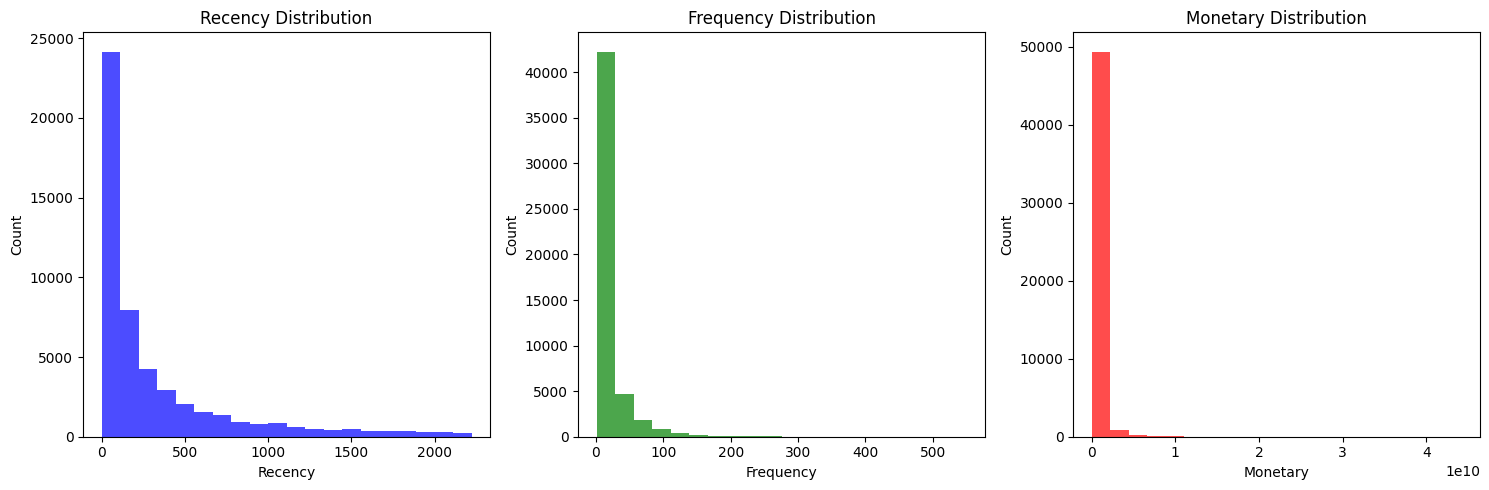

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

# Recency 시각화
plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Recency')
plt.ylabel('Count')
plt.title('Recency Distribution')

# Frequency 시각화
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency'], bins=20, color='green', alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')

# Monetary 시각화
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Monetary'], bins=20, color='red', alpha=0.7)
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

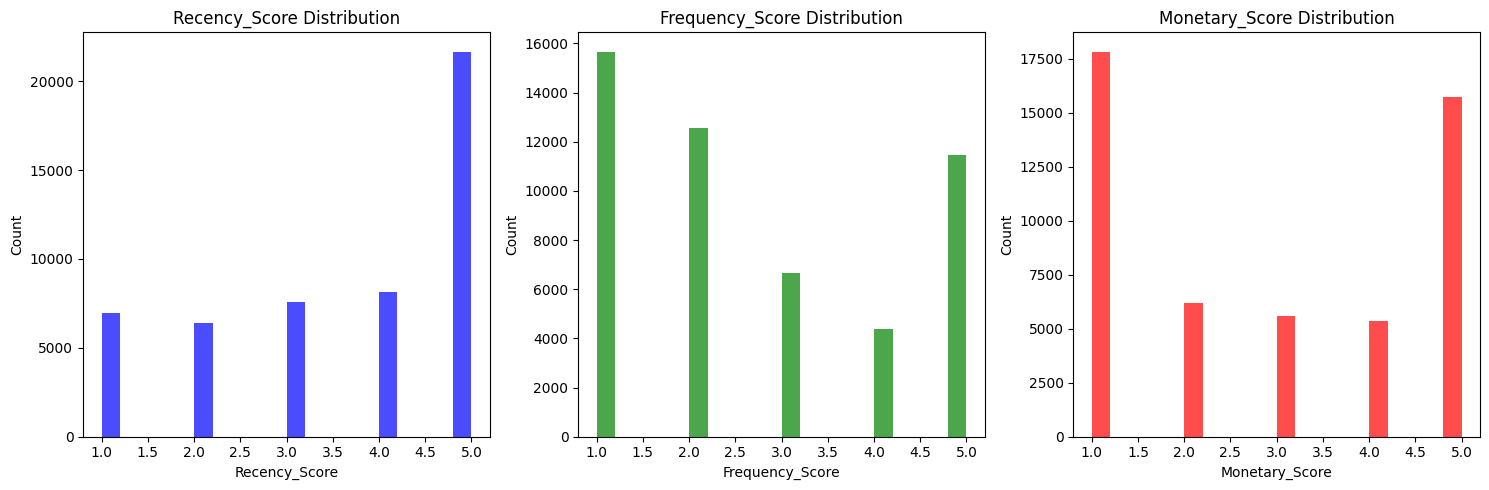

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

# Recency_Score 시각화
plt.subplot(1, 3, 1)
plt.hist(rfm_df['Recency_Score'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Recency_Score')
plt.ylabel('Count')
plt.title('Recency_Score Distribution')

# Frequency_Score 시각화
plt.subplot(1, 3, 2)
plt.hist(rfm_df['Frequency_Score'], bins=20, color='green', alpha=0.7)
plt.xlabel('Frequency_Score')
plt.ylabel('Count')
plt.title('Frequency_Score Distribution')

# Monetary_Score 시각화
plt.subplot(1, 3, 3)
plt.hist(rfm_df['Monetary_Score'], bins=20, color='red', alpha=0.7)
plt.xlabel('Monetary_Score')
plt.ylabel('Count')
plt.title('Monetary_Score Distribution')

plt.tight_layout()
plt.show()

팀원들과 논의한 결과 보통 개인정보 관리를 위해 1년간 접속 되지 않은 계정은 휴면 상태로 분리되기 때문에 최근에 주문한 기록이 1년이 넘어가는 고객들을 이탈 고객으로 설정

주문을 하지 않고 방문만 하는 고객의 경우 구경만 하거나 가격 비교를 위해 들어와서 결제는 다른사이트에서 하는 것으로 생각 되며 이경우 꾸준히 접속해도 이탈 고객으로 봐야 되겠다고 생각

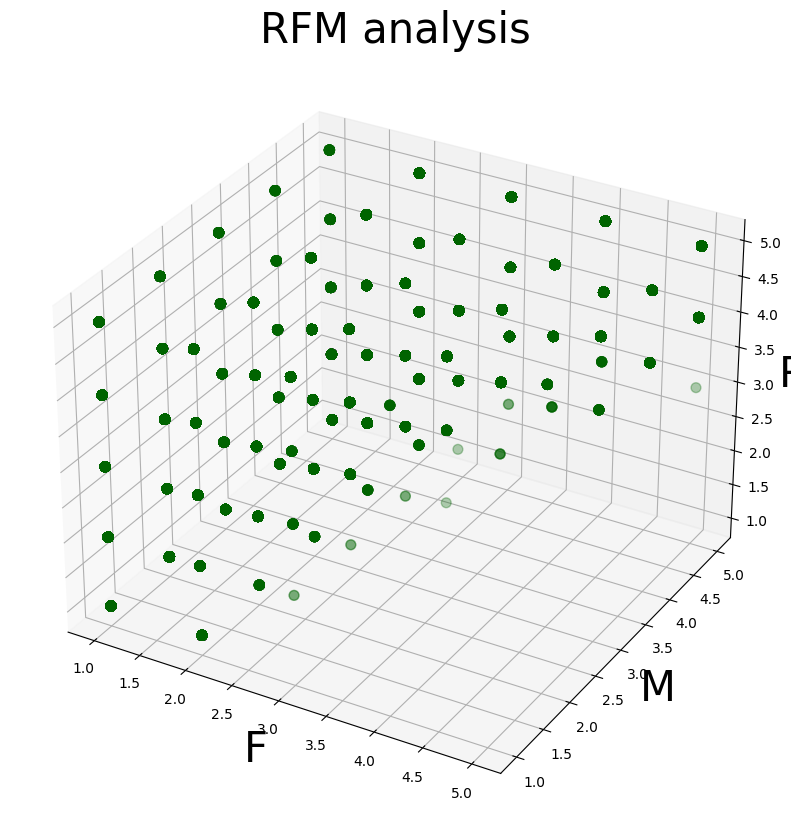

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
X = rfm_df['Frequency_Score']
Y = rfm_df['Monetary_Score']
Z = rfm_df['Recency_Score']

ax.scatter(X,Y,Z, marker='o', s = 50, c='darkgreen', alpha = 0.3)
ax.set_xlabel('F', size=30)
ax.set_ylabel('M', size=30)
ax.set_zlabel('R', size=30)
ax.set_title('RFM analysis', size = 30)

plt.show()

In [ ]:
# rfm_df에 있는 Recency_Score, Frequency_Score 열을 기준으로 교차표 생성
cross_tab = pd.crosstab([rfm_df['Recency_Score']], rfm_df['Frequency_Score'], margins=True)

# 열 순서를 역순으로 변경
cross_tab = cross_tab.iloc[::-1, ::-1]

print(cross_tab)

Frequency_Score    All      5     4     3      2      1
Recency_Score                                          
All              50704  11444  4369  6660  12565  15666
5                21660  11077  2993  3133   3199   1258
4                 8126    366  1351  2339   2682   1388
3                 7561      1    25  1179   3780   2576
2                 6411      0     0     9   2647   3755
1                 6946      0     0     0    257   6689


In [ ]:
# rfm_df에 있는 Recency_Score, Frequency_Score, Monetary_Score 열을 기준으로 교차표 생성
cross_tab = pd.crosstab([rfm_df['Frequency_Score'], rfm_df['Monetary_Score']], rfm_df['Recency_Score'], margins=True)

print(cross_tab)

Recency_Score                       5     4     3     2     1    All
Frequency_Score Monetary_Score                                      
1               1                1038  1079  2086  3006  5524  12733
                2                 102   126   230   300   482   1240
                3                  51    81   102   184   274    692
                4                  29    41    73   122   160    425
                5                  38    61    85   143   249    576
2               1                1252   873  1297  1245   140   4807
                2                 739   783   958   603    39   3122
                3                 441   432   572   307    34   1786
                4                 320   252   403   228    19   1222
                5                 447   342   550   264    25   1628
3               1                 223    36    28     2     0    289
                2                 692   479   295     2     0   1468
                3                 

In [ ]:
# Rank 칼럼 생성 함수 정의
def assign_rank(row):
    if row['Recency_Score'] in [5] and row['Frequency_Score'] in [5, 4]:
        return 'regular'
    elif row['Recency_Score'] in [4] and row['Frequency_Score'] in [5]:
        return 'regular'
    elif row['Recency_Score'] in [5] and row['Frequency_Score'] in [3]:
        return 'stable_customer'
    elif row['Recency_Score'] in [4] and row['Frequency_Score'] in [4, 3, 2, 1]:
        return 'stable_customer'
    elif row['Recency_Score'] in [5] and row['Frequency_Score'] in [2, 1]:
        return 'new_customer'
    elif row['Recency_Score'] == 3:
        return 'churn_precursor'
    elif row['Recency_Score'] in [1, 2]:
        return 'churn_customer'
    else:
        return 'unknown'

# Rank 칼럼 생성 및 추가
rfm_df['Rank'] = rfm_df.apply(assign_rank, axis=1)

In [ ]:
rfm_df

customer_id  click_date  Recency  Frequency    Monetary  \
0                3  2022-06-20       41         51   233745623   
1                8  2022-05-07       85          7    12080746   
2                9  2022-05-24       68          6    14411450   
3               11  2022-03-07      146          1      790132   
4               15  2021-12-12      231          5    36521548   
...            ...         ...      ...        ...         ...   
50699        99992  2022-05-24       68         12    85703956   
50700        99995  2022-07-28        3         60   160584087   
50701        99997  2020-04-25      827          1      905844   
50702        99998  2022-01-11      201          8  1225278556   
50703        99999  2016-10-12     2118          1     2353332   

      first_join_date  Recency_Score  Frequency_Score  Monetary_Score  \
0          2018-08-25              5                5               5   
1          2021-02-13              5                2               2   
2          2021-06-26              5                2               3   
3          2022-03-06              4                1               1   
4          2019-09-28              3                2               4   
...               ...            ...              ...             ...   
50699      2020-06-30              5                3               5   
50700      2020-08-16              5                5               5   
50701      2020-04-25              1                1               1   
50702      2018-07-01              3                3               5   
50703      2016-10-12              1                1               1   

                  Rank  
0              regular  
1         new_customer  
2         new_customer  
3      stable_customer  
4      churn_precursor  
...                ...  
50699  stable_customer  
50700          regular  
50701   churn_customer  
50702  churn_precursor  
50703   churn_customer  

[50704 rows x 10 columns]

In [ ]:
rfm_df.Rank.value_counts()

regular            14436
churn_customer     13357
stable_customer    10893
churn_precursor     7561
new_customer        4457
Name: Rank, dtype: int64

In [ ]:
df_customer_churn = df_customer.copy()

In [ ]:
# df_customer_churn에 rfm_df의 정보 합치기
df_customer_churn = df_customer_churn.merge(rfm_df[['customer_id', 'click_date', 'Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Rank']], on='customer_id', how='left')

# Rank의 NAN을 'churn'으로 바꾸기
df_customer_churn['Rank'] = df_customer_churn['Rank'].fillna('churn_customer')

# 나머지 칼럼들의 NAN을 0으로 바꾸기
columns_to_fill_zero = ['Recency', 'Frequency', 'Monetary', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']
df_customer_churn[columns_to_fill_zero] = df_customer_churn[columns_to_fill_zero].fillna(0)

# churn 칼럼 생성
df_customer_churn['churn'] = df_customer_churn['Rank'].apply(lambda x: 1 if x == 'churn_customer' else 0)

* EDA 데이터 다운

In [ ]:
df_customer_churn.to_csv('df_customer_churn.csv', index=False)

In [ ]:
rfm_df.to_csv('rfm_df.csv', index=False)

* 데이터 불러오기

In [ ]:
rfm_df = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/rfm_df.csv')

In [ ]:
df_customer_churn = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/df_customer_churn.csv')

In [ ]:
df_product = pd.read_csv('/content/gdrive/MyDrive/Sprint/Section6_Project2/product.csv', on_bad_lines='skip')

In [ ]:
df_customer_churn.churn.value_counts()

0    62653
1    37347
Name: churn, dtype: int64

In [ ]:
rfm_df.Rank.value_counts()

regular            14436
churn_customer     13357
stable_customer    10893
churn_precursor     7561
new_customer        4457
Name: Rank, dtype: int64

In [ ]:
# customer_id를 기준으로 데이터 합치기
df_ct_merged = pd.merge(df_transaction_new, df_customer_churn, on='customer_id', how='inner')

In [ ]:
df_product.rename(columns={'id': 'product_id'}, inplace=True)

In [ ]:
df_ct_merged = pd.merge(df_ct_merged, df_product, on='product_id', how='inner')

In [ ]:
df_ct_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253966 entries, 0 to 1253965
Data columns (total 49 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1253966 non-null  datetime64[ns, UTC]
 1   customer_id             1253966 non-null  int64              
 2   booking_id              1253966 non-null  object             
 3   session_id              1253966 non-null  object             
 4   payment_method          1253966 non-null  object             
 5   payment_status          1253966 non-null  object             
 6   promo_amount            1253966 non-null  int64              
 7   promo_code              480908 non-null   object             
 8   shipment_fee            1253966 non-null  int64              
 9   shipment_date_limit     1253966 non-null  object             
 10  shipment_location_lat   1253966 non-null  float64            
 11  shipment_lo

<Figure size 1000x600 with 0 Axes>

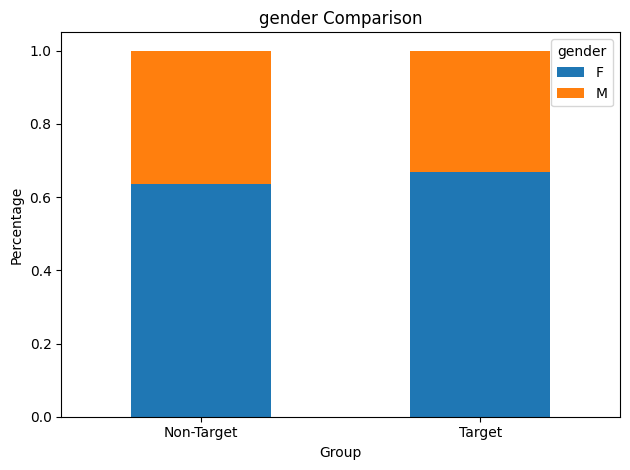

<Figure size 1000x600 with 0 Axes>

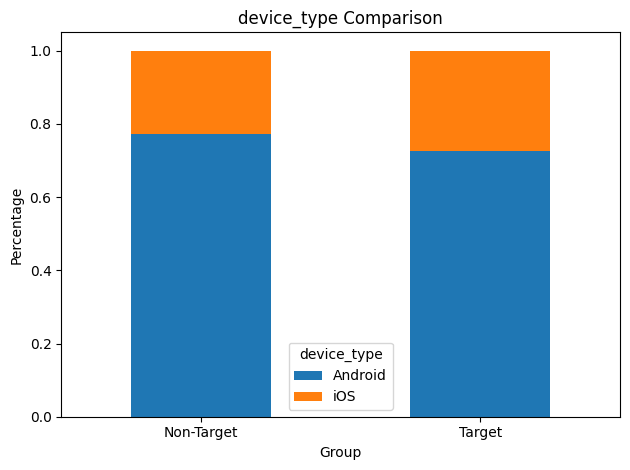

<Figure size 1000x600 with 0 Axes>

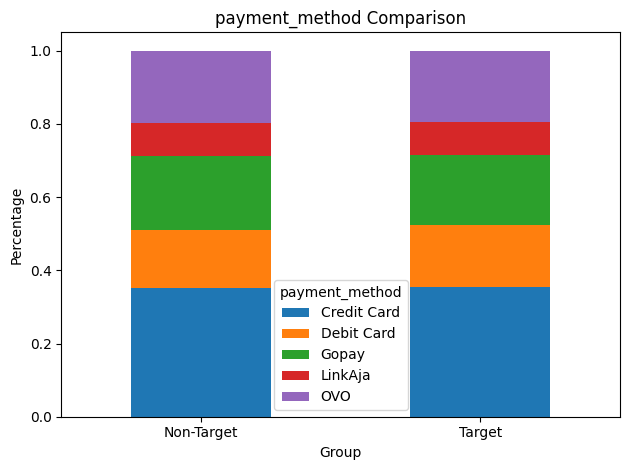

<Figure size 1000x600 with 0 Axes>

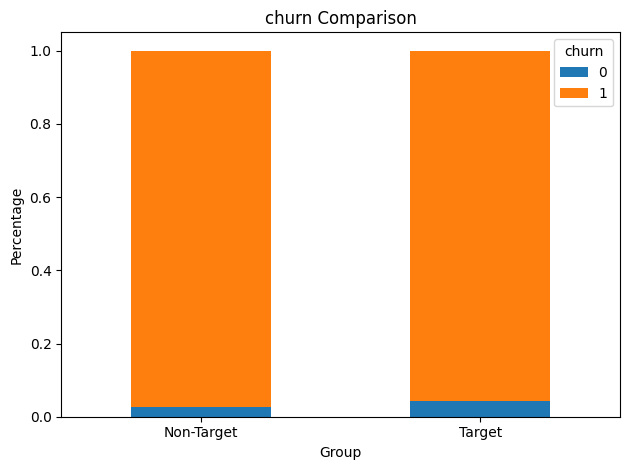

In [ ]:
# 원하는 월들의 목록
target_months = ['2016-07', '2016-12', '2017-12', '2018-06', '2018-12', '2020-05', '2020-12', '2021-05', '2021-12']

# 'first_join_date'를 날짜 형식으로 변환
df_ct_merged['first_join_date'] = pd.to_datetime(df_ct_merged['first_join_date'])

# 'first_join_date'에서 월 정보 추출하여 'join_month' 칼럼 추가
df_ct_merged['join_month'] = df_ct_merged['first_join_date'].apply(lambda x: f'{x.year}-{x.month:02d}')

# 원하는 월에 가입한 고객과 그렇지 않은 고객 분류
df_ct_merged['target_group'] = df_ct_merged['join_month'].apply(lambda x: 'Target' if x in target_months else 'Non-Target')

# 비교할 칼럼들 선택
compare_columns = ['gender', 'device_type', 'payment_method', 'churn']


# 시각화
for column in compare_columns:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df_ct_merged['target_group'], df_ct_merged[column], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{column} Comparison')
    plt.xlabel('Group')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title=column)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

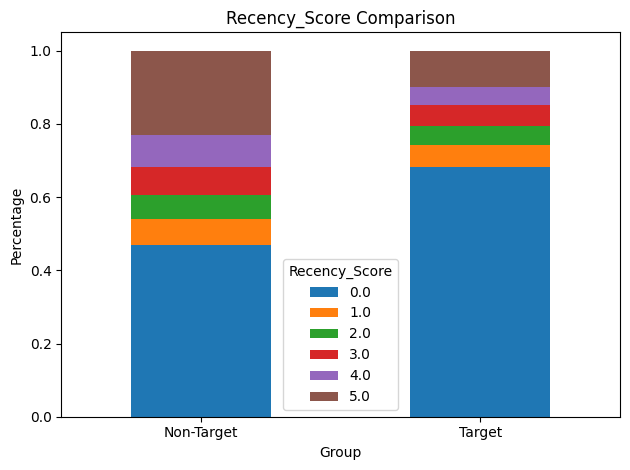

<Figure size 1000x600 with 0 Axes>

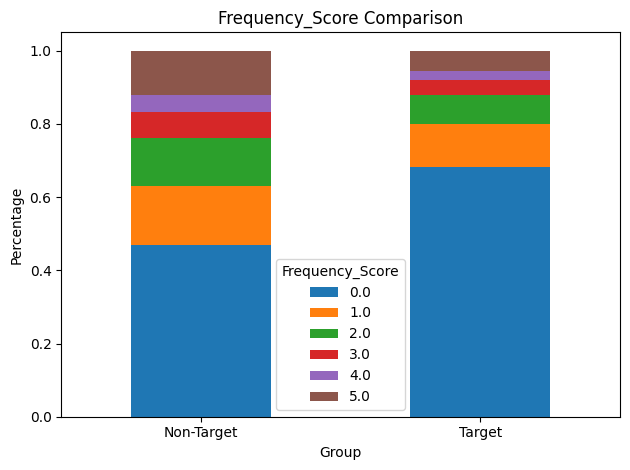

<Figure size 1000x600 with 0 Axes>

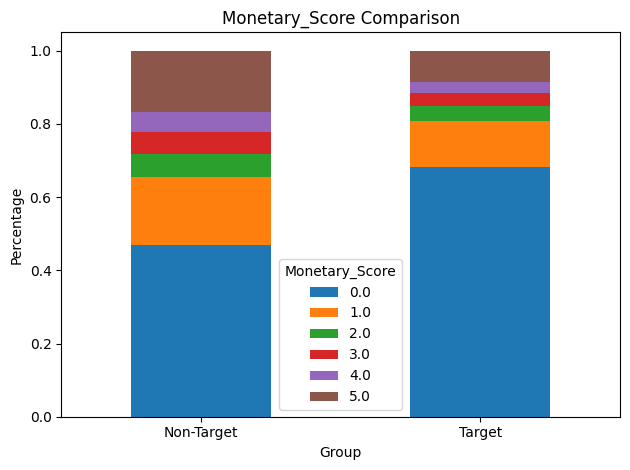

<Figure size 1000x600 with 0 Axes>

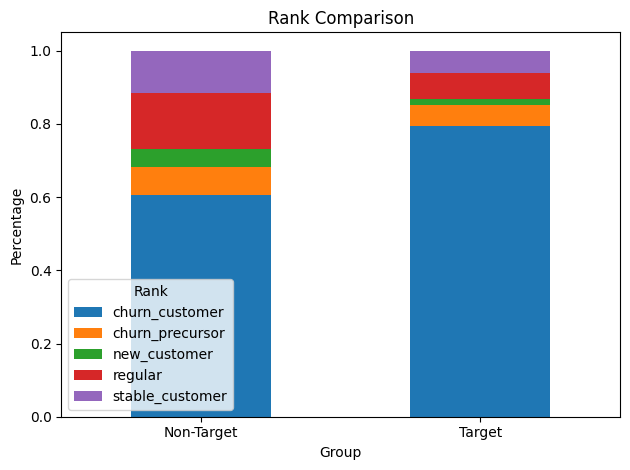

In [ ]:
# 원하는 월들의 목록
target_months = ['2016-07', '2016-12', '2017-12', '2018-06', '2018-12', '2020-05', '2020-12', '2021-05', '2021-12']

# 'first_join_date'를 날짜 형식으로 변환
df_customer_churn['first_join_date'] = pd.to_datetime(df_customer_churn['first_join_date'])

# 'first_join_date'에서 월 정보 추출하여 'join_month' 칼럼 추가
df_customer_churn['join_month'] = df_customer_churn['first_join_date'].apply(lambda x: f'{x.year}-{x.month:02d}')

# 원하는 월에 가입한 고객과 그렇지 않은 고객 분류
df_customer_churn['target_group'] = df_customer_churn['join_month'].apply(lambda x: 'Target' if x in target_months else 'Non-Target')

# 비교할 칼럼들 선택
compare_columns = ['Recency_Score',	'Frequency_Score',	'Monetary_Score',	'Rank']


# 시각화
for column in compare_columns:
    plt.figure(figsize=(10, 6))
    cross_tab = pd.crosstab(df_customer_churn['target_group'], df_customer_churn[column], normalize='index')
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{column} Comparison')
    plt.xlabel('Group')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title=column)
    plt.tight_layout()
    plt.show()

In [ ]:
df_ct_merged

created_at  customer_id  \
0       2018-07-29 15:22:01.458193+00:00         5868   
1       2018-07-30 12:40:22.365620+00:00         4774   
2       2018-09-15 11:51:17.365620+00:00         4774   
3       2018-11-01 11:23:48.365620+00:00         4774   
4       2018-12-18 11:20:30.365620+00:00         4774   
...                                  ...          ...   
1254573 2021-09-21 22:10:05.074873+00:00        25121   
1254574 2021-12-09 07:35:18.222046+00:00        34829   
1254575 2021-12-11 01:20:36.944593+00:00        99645   
1254576 2019-12-18 11:01:09.623382+00:00        87319   
1254577 2019-12-19 12:47:14.701215+00:00        58180   

                                   booking_id  \
0        186e2bee-0637-4710-8981-50c2d737bc42   
1        caadb57b-e808-4f94-9e96-8a7d4c9898db   
2        6000fffb-9c1a-4f4a-9296-bc8f6b622b50   
3        f5e530a7-4350-4cd1-a3bc-525b5037bcab   
4        0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2   
...                                       ...   
1254573  66f02fa4-c62e-497a-8b6e-be239009b50a   
1254574  ccde6b83-ee42-4cce-b2cd-976574886eac   
1254575  5bcd3434-1dc6-44bb-ae63-fd19714cbd6c   
1254576  af7f291a-b01b-4bfd-89a9-237b16368b15   
1254577  b242e188-5f94-4448-a038-c5865842374b   

                                   session_id payment_method payment_status  \
0        3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card        Success   
1        2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card        Success   
2        93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO        Success   
3        bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card        Success   
4        df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card        Success   
...                                       ...            ...            ...   
1254573  484eecde-9f4a-42de-a8df-7ce6668101f4     Debit Card         Failed   
1254574  954e1211-4d45-4d0b-ba84-53e80119592c            OVO        Success   
1254575  e6e6c108-abd0-49a2-b0a5-691117f9cfe1    Credit Card        Success   
1254576  bb6e5426-a3f3-426a-b99d-79173eaa234b    Credit Card        Success   
1254577  5e3183df-198b-40e0-b861-27ef694a832a          Gopay        Success   

         promo_amount   promo_code  shipment_fee          shipment_date_limit  \
0                1415  WEEKENDSERU         10000  2018-08-03T05:07:24.812676Z   
1                   0          NaN         10000  2018-08-03T01:29:03.415705Z   
2                   0          NaN         10000  2018-09-18T08:41:49.422380Z   
3                   0          NaN             0  2018-11-05T17:42:27.954235Z   
4                   0          NaN             0  2018-12-23T17:24:07.361785Z   
...               ...          ...           ...                          ...   
1254573             0          NaN             0  2021-09-27T00:43:40.992167Z   
1254574          5010       AZ2022         10000  2021-12-12T07:52:44.803822Z   
1254575          2181  WEEKENDSERU          5000  2021-12-12T13:28:22.848703Z   
1254576          4503       AZ2022             0  2019-12-23T22:56:46.831720Z   
1254577          4724      BUYMORE         10000  2019-12-23T06:02:05.828334Z   

         ...  order_date  click_date  Recency  Frequency   Monetary  \
0        ...  2018-07-29  2018-07-29     1463          1     799328   
1        ...  2018-07-30  2022-06-05       56         31  152006257   
2        ...  2018-09-15  2022-06-05       56         31  152006257   
3        ...  2018-11-01  2022-06-05       56         31  152006257   
4        ...  2018-12-18  2022-06-05       56         31  152006257   
...      ...         ...         ...      ...        ...        ...   
1254573  ...  2021-09-21  2021-08-15      350          2     741328   
1254574  ...  2021-12-09  2021-12-09      234          1     718406   
1254575  ...  2021-12-11  2021-12-11      232          1    4632636   
1254576  ...  2019-12-18  2019-12-18      956          1     184143   
1254577  ...  2019-12-19  2019-12-19      955        

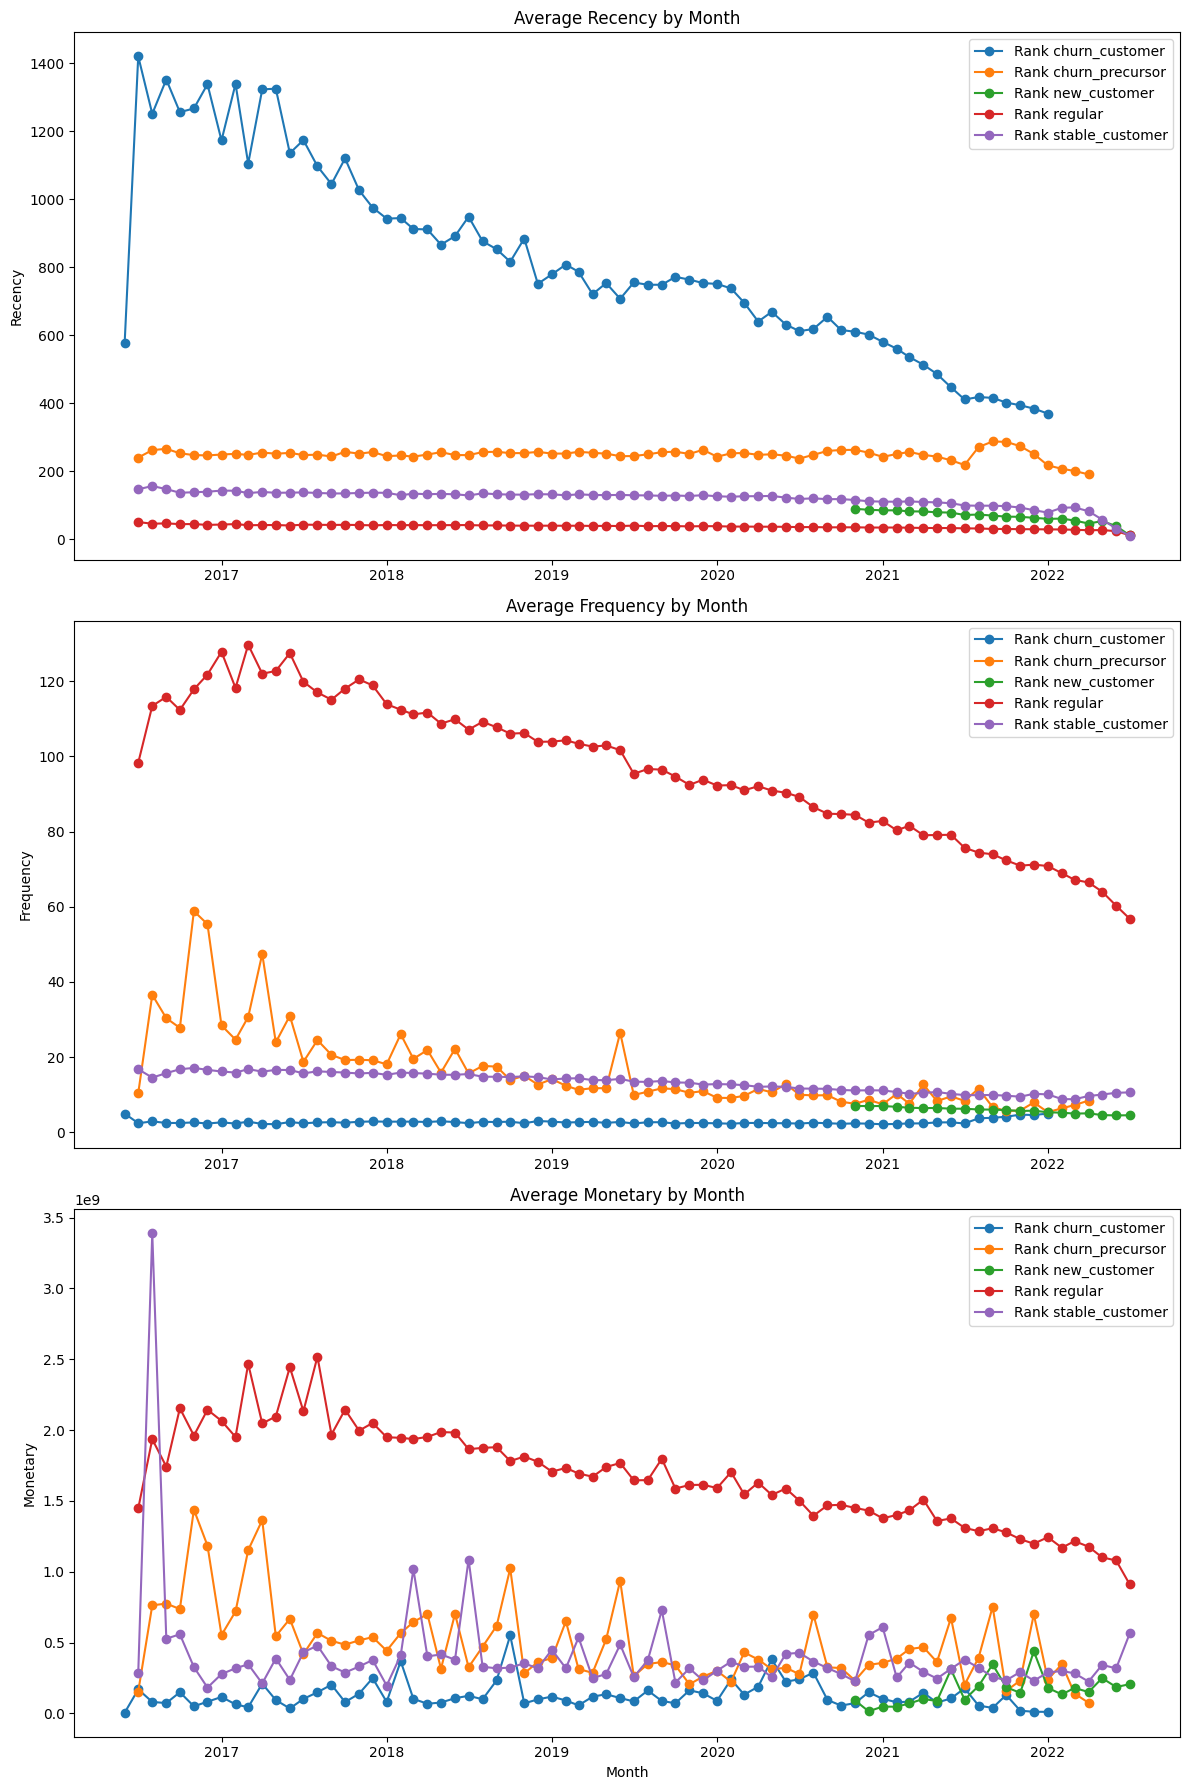

In [ ]:
# df_ct_merged의 order_date를 연도와 월로 그룹화하여 평균을 구합니다.
df_ct_merged['order_month'] = df_ct_merged['order_date'].apply(lambda x: x.replace(day=1))
df_monthly_avg = df_ct_merged.groupby(['Rank', 'order_month']).mean().reset_index()

# Recency, Frequency, Monetary 각각에 대한 시각화를 위한 그래프 작성
plt.figure(figsize=(12, 18))

for i, metric in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(3, 1, i + 1)
    for rank in df_monthly_avg['Rank'].unique():
        rank_data = df_monthly_avg[df_monthly_avg['Rank'] == rank]
        plt.plot(rank_data['order_month'], rank_data[metric], marker='o', label=f'Rank {rank}')
    plt.title(f'Average {metric} by Month')
    plt.ylabel(metric)
    plt.legend()

plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [ ]:
top_mc_by_rank = df_ct_merged.groupby(['Rank', 'masterCategory'])['quantity'].sum().reset_index()
top_mc_by_rank = top_mc_by_rank.sort_values(by=['Rank', 'quantity'], ascending=[True, False])
top_5_mc_by_rank = top_mc_by_rank.groupby('Rank').head(5)

print(top_5_mc_by_rank)

               Rank masterCategory  quantity
1    churn_customer        Apparel     25421
0    churn_customer    Accessories     13510
2    churn_customer       Footwear     11017
5    churn_customer  Personal Care      2967
3    churn_customer     Free Items       153
8   churn_precursor        Apparel     34834
7   churn_precursor    Accessories     18704
9   churn_precursor       Footwear     15104
11  churn_precursor  Personal Care      3979
10  churn_precursor     Free Items       165
14     new_customer        Apparel     18776
13     new_customer    Accessories      9722
15     new_customer       Footwear      8081
17     new_customer  Personal Care      2201
16     new_customer     Free Items        76
20          regular        Apparel    713033
19          regular    Accessories    376213
21          regular       Footwear    307869
24          regular  Personal Care     80334
22          regular     Free Items      3469
27  stable_customer        Apparel     98079
26  stable

많이 산 제품 top5

의복, 부속품, 신발류, 화장품, 무료 제공

In [ ]:
top_mc_by_rank = df_ct_merged.groupby(['Rank', 'masterCategory'])['total_amount'].sum().reset_index()
top_mc_by_rank = top_mc_by_rank.sort_values(by=['Rank', 'total_amount'], ascending=[True, False])
top_5_mc_by_rank = top_mc_by_rank.groupby('Rank').head(5)

print(top_5_mc_by_rank)

               Rank masterCategory  total_amount
1    churn_customer        Apparel   19302842535
0    churn_customer    Accessories   10400818341
2    churn_customer       Footwear    8185936776
5    churn_customer  Personal Care    2139380143
3    churn_customer     Free Items     125525315
8   churn_precursor        Apparel   29070014124
7   churn_precursor    Accessories   15686906651
9   churn_precursor       Footwear   12524274372
11  churn_precursor  Personal Care    3167209811
10  churn_precursor     Free Items     133856618
14     new_customer        Apparel   15118499420
13     new_customer    Accessories    7578506515
15     new_customer       Footwear    6229198398
17     new_customer  Personal Care    1687385813
16     new_customer     Free Items      64696257
20          regular        Apparel  571096990437
19          regular    Accessories  301380422847
21          regular       Footwear  247335545732
24          regular  Personal Care   64311103862
22          regular 

매출액 순위 top5

의복, 부속품, 신발류, 화장품, 무료 제공

In [ ]:
top_sc_by_rank = df_ct_merged.groupby(['Rank', 'subCategory'])['quantity'].sum().reset_index()
top_sc_by_rank = top_sc_by_rank.sort_values(by=['Rank', 'quantity'], ascending=[True, False])
top_5_sc_by_rank = top_sc_by_rank.groupby('Rank').head(5)

print(top_5_sc_by_rank)

                Rank subCategory  quantity
38    churn_customer     Topwear     18317
30    churn_customer       Shoes      8839
2     churn_customer        Bags      3639
41    churn_customer     Watches      3193
6     churn_customer  Bottomwear      3154
81   churn_precursor     Topwear     24835
73   churn_precursor       Shoes     12039
46   churn_precursor        Bags      5113
50   churn_precursor  Bottomwear      4470
85   churn_precursor     Watches      4101
125     new_customer     Topwear     13417
117     new_customer       Shoes      6403
90      new_customer        Bags      2633
94      new_customer  Bottomwear      2382
128     new_customer     Watches      2116
169          regular     Topwear    513211
161          regular       Shoes    245727
133          regular        Bags    102351
137          regular  Bottomwear     89611
173          regular     Watches     84675
214  stable_customer     Topwear     70949
206  stable_customer       Shoes     33341
178  stable

In [ ]:
top_sc_by_rank = df_ct_merged.groupby(['Rank', 'subCategory'])['total_amount'].sum().reset_index()
top_sc_by_rank = top_sc_by_rank.sort_values(by=['Rank', 'total_amount'], ascending=[True, False])
top_5_sc_by_rank = top_sc_by_rank.groupby('Rank').head(5)

print(top_5_sc_by_rank)

                Rank subCategory  total_amount
38    churn_customer     Topwear   13935461617
30    churn_customer       Shoes    6545783846
2     churn_customer        Bags    2764624107
41    churn_customer     Watches    2496813261
6     churn_customer  Bottomwear    2370961857
81   churn_precursor     Topwear   20969642777
73   churn_precursor       Shoes    9951790629
46   churn_precursor        Bags    4321879814
50   churn_precursor  Bottomwear    3573424092
85   churn_precursor     Watches    3364954062
125     new_customer     Topwear   10804598865
117     new_customer       Shoes    4912890336
90      new_customer        Bags    2114920564
94      new_customer  Bottomwear    1924996879
128     new_customer     Watches    1614045110
169          regular     Topwear  410993570769
161          regular       Shoes  197428780291
133          regular        Bags   81660672110
137          regular  Bottomwear   71963883253
173          regular     Watches   67720273638
214  stable_c

상의, 신발, 가방, 하의, 시계

In [ ]:
top_at_by_rank = df_ct_merged.groupby(['Rank', 'articleType'])['quantity'].sum().reset_index()
top_at_by_rank = top_at_by_rank.sort_values(by=['Rank', 'quantity'], ascending=[True, False])
top_5_at_by_rank = top_at_by_rank.groupby('Rank').head(5)

print(top_5_at_by_rank)

                Rank   articleType  quantity
132   churn_customer       Tshirts      8173
103   churn_customer        Shirts      3929
19    churn_customer  Casual Shoes      3432
138   churn_customer       Watches      3193
110   churn_customer  Sports Shoes      2434
270  churn_precursor       Tshirts     11486
241  churn_precursor        Shirts      5050
160  churn_precursor  Casual Shoes      4759
276  churn_precursor       Watches      4101
248  churn_precursor  Sports Shoes      3321
405     new_customer       Tshirts      6070
376     new_customer        Shirts      2857
298     new_customer  Casual Shoes      2490
411     new_customer       Watches      2116
383     new_customer  Sports Shoes      1853
548          regular       Tshirts    235667
518          regular        Shirts    107162
433          regular  Casual Shoes     94628
554          regular       Watches     84675
526          regular  Sports Shoes     68559
691  stable_customer       Tshirts     32287
661  stabl

In [ ]:
top_at_by_rank = df_ct_merged.groupby(['Rank', 'articleType'])['total_amount'].sum().reset_index()
top_at_by_rank = top_at_by_rank.sort_values(by=['Rank', 'total_amount'], ascending=[True, False])
top_5_at_by_rank = top_at_by_rank.groupby('Rank').head(5)

print(top_5_at_by_rank)

                Rank   articleType  total_amount
132   churn_customer       Tshirts    6342643726
103   churn_customer        Shirts    2957773782
138   churn_customer       Watches    2496813261
19    churn_customer  Casual Shoes    2473132095
110   churn_customer  Sports Shoes    1883231498
270  churn_precursor       Tshirts    9702198275
241  churn_precursor        Shirts    4220982148
160  churn_precursor  Casual Shoes    4005234502
276  churn_precursor       Watches    3364954062
248  churn_precursor  Sports Shoes    2780038294
405     new_customer       Tshirts    4745844116
376     new_customer        Shirts    2301726860
298     new_customer  Casual Shoes    1936533121
411     new_customer       Watches    1614045110
383     new_customer  Sports Shoes    1461374847
548          regular       Tshirts  188107728722
518          regular        Shirts   85490305734
433          regular  Casual Shoes   76293010498
554          regular       Watches   67720273638
526          regular

티셔츠, 셔츠, 캐주얼신발, 시계, 스포츠 신발

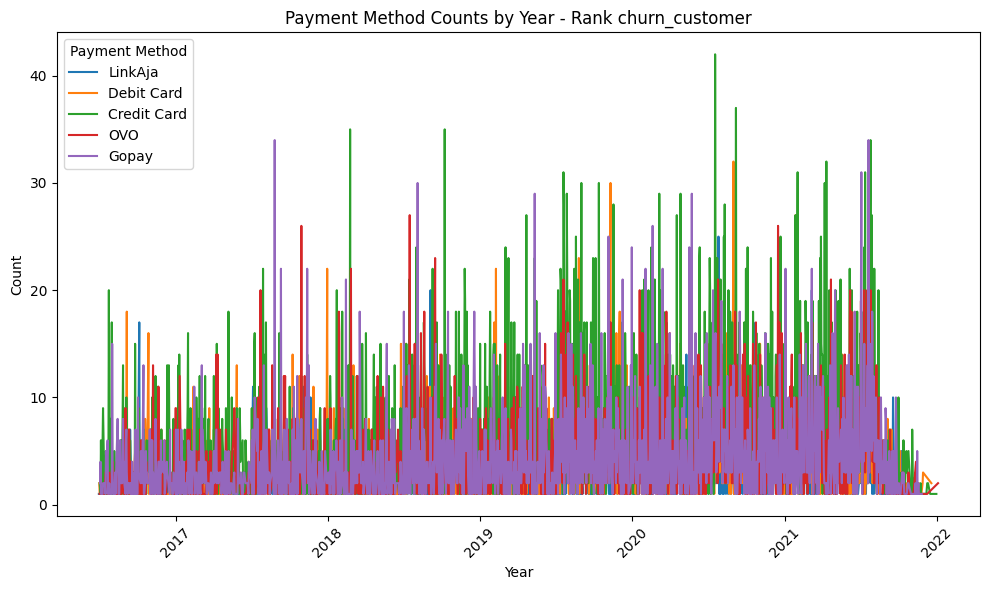

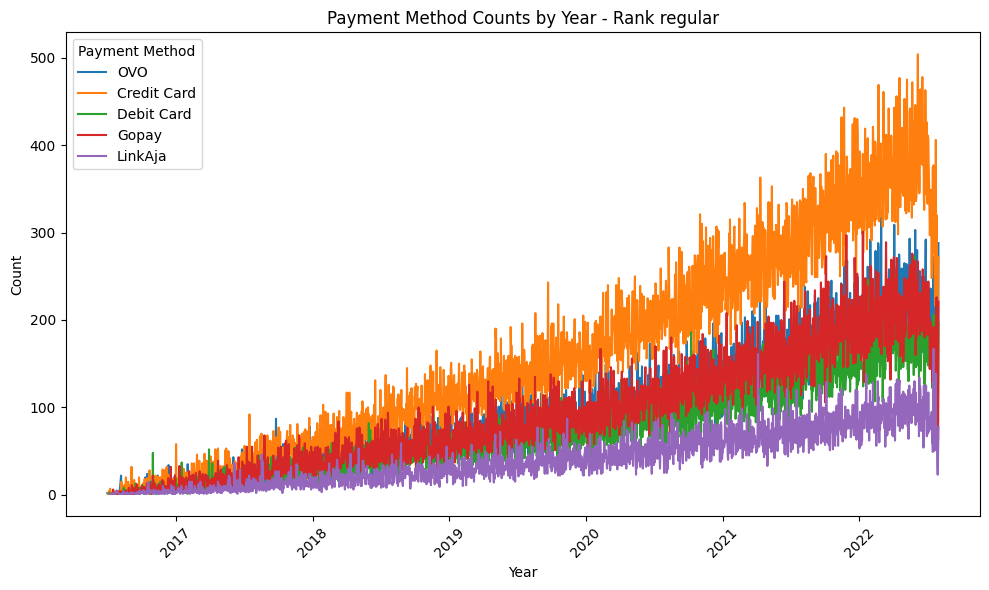

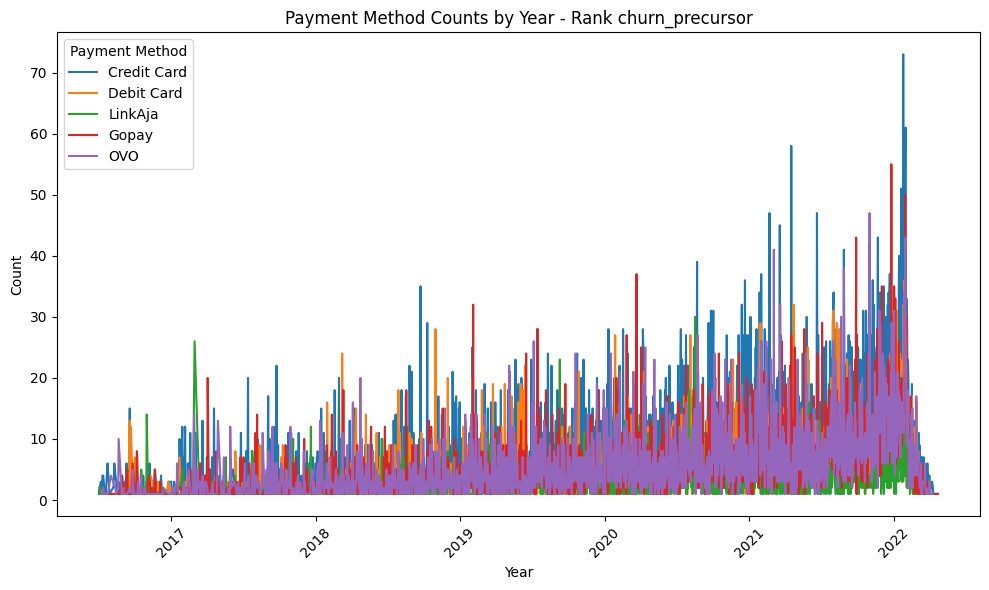

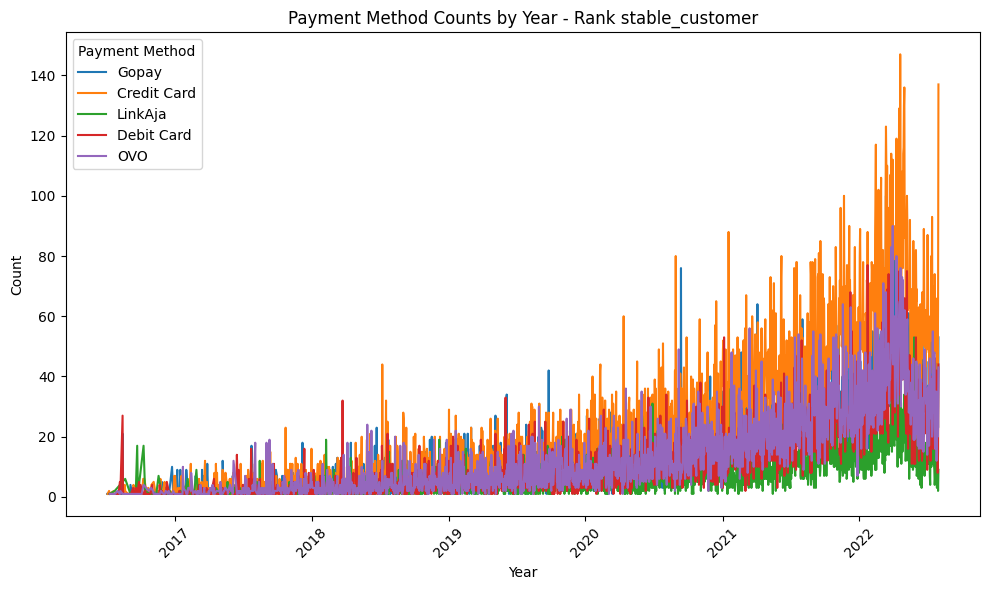

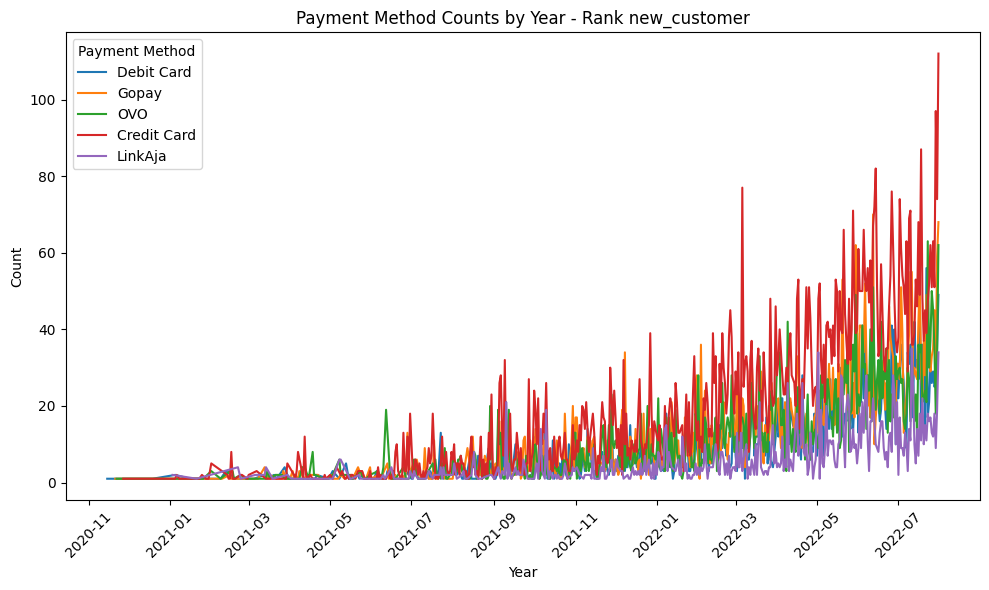

In [ ]:
# Rank별로 연도와 payment_method 종류를 기준으로 데이터를 그룹화하여 카운트 계산
payment_method_counts = df_ct_merged.groupby(['Rank', 'order_date', 'payment_method'])['customer_id'].count().reset_index()

# Rank별로 따로 시각화
for rank in df_ct_merged['Rank'].unique():
    rank_data = payment_method_counts[payment_method_counts['Rank'] == rank]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=rank_data, x='order_date', y='customer_id', hue='payment_method')
    plt.title(f'Payment Method Counts by Year - Rank {rank}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Payment Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# 'order_date'를 연도별로 그룹화하여 각 연도별로 각 payment_method 종류별 사용 횟수를 더함
yearly_payment_counts = df_ct_merged.groupby([df_ct_merged['order_date'].dt.year, 'Rank', 'payment_method'])['customer_id'].count().reset_index()

# Pivot 테이블 생성
pivot_table = yearly_payment_counts.pivot_table(index=['order_date', 'Rank'], columns='payment_method', values='customer_id', aggfunc='sum', fill_value=0)

# 필요한 payment_method 종류 선택
selected_methods = ['Credit Card', 'Debit Card', 'Gopay', 'LinkAja', 'OVO']

# 선택한 payment_method 종류에 해당하는 데이터만 추출
selected_pivot = pivot_table[selected_methods]

print(selected_pivot)

payment_method              Credit Card  Debit Card  Gopay  LinkAja    OVO
order_date Rank                                                           
2016       churn_customer           527         238    333      161    284
           churn_precursor          186         107     95       57     71
           regular                 1619         762    887      291    964
           stable_customer          125         107     93       78     52
2017       churn_customer          1346         695    841      339    819
           churn_precursor          929         415    492      250    500
           regular                13744        6657   8501     3382   8064
           stable_customer         1154         513    623      266    616
2018       churn_customer          1983         976   1135      559   1115
           churn_precursor         1876         891    980      470    901
           regular                30862       14498  18285     7538  17951
           stable_custome

Regular 고객은 크레딧 카드(Credit Card)를 가장 많이 사용하는 경향이 있습니다. 연도별로 크레딧 카드 사용량이 증가하고 있는 것으로 보입니다.

Churn Precursor의 경우 각 연도별로 크레딧 카드와 데빗 카드(Debit Card)를 주로 사용하는 경향이 있습니다. 특히 2021년 이후에 크레딧 카드 사용량이 두드러지게 증가하였습니다.

New Customer는 주로 크레딧 카드와 데빗 카드를 사용하는 경향이 있습니다. 2020년에는 Gopay와 LinkAja의 사용량이 늘어난 것으로 보이나, 실제로는 해당 데이터가 매우 적기 때문에 주의가 필요합니다.

StabCustomer은 주로 크레딧 카드, 데빗 카드, Gopay를 사용하는 경향이 있습니다. 이 고객 그룹은 연도별로 변동이 적은 안정적인 사용 패턴을 보이고 있습니다.

각 Payment Method별로 연도에 따른 사용량의 변화를 분석할 수 있습니다. 특히 OVO는 2019년에 감소하는 추세를 보이다가 2020년부터 다시 증가하는 모습을 보이고 있습니다.


신용카드가 가장 많이 쓰이고 Gopay와 OVO 디지털 전자지갑 결제가 서로 비슷한 수치로 사용이 증가한 상황

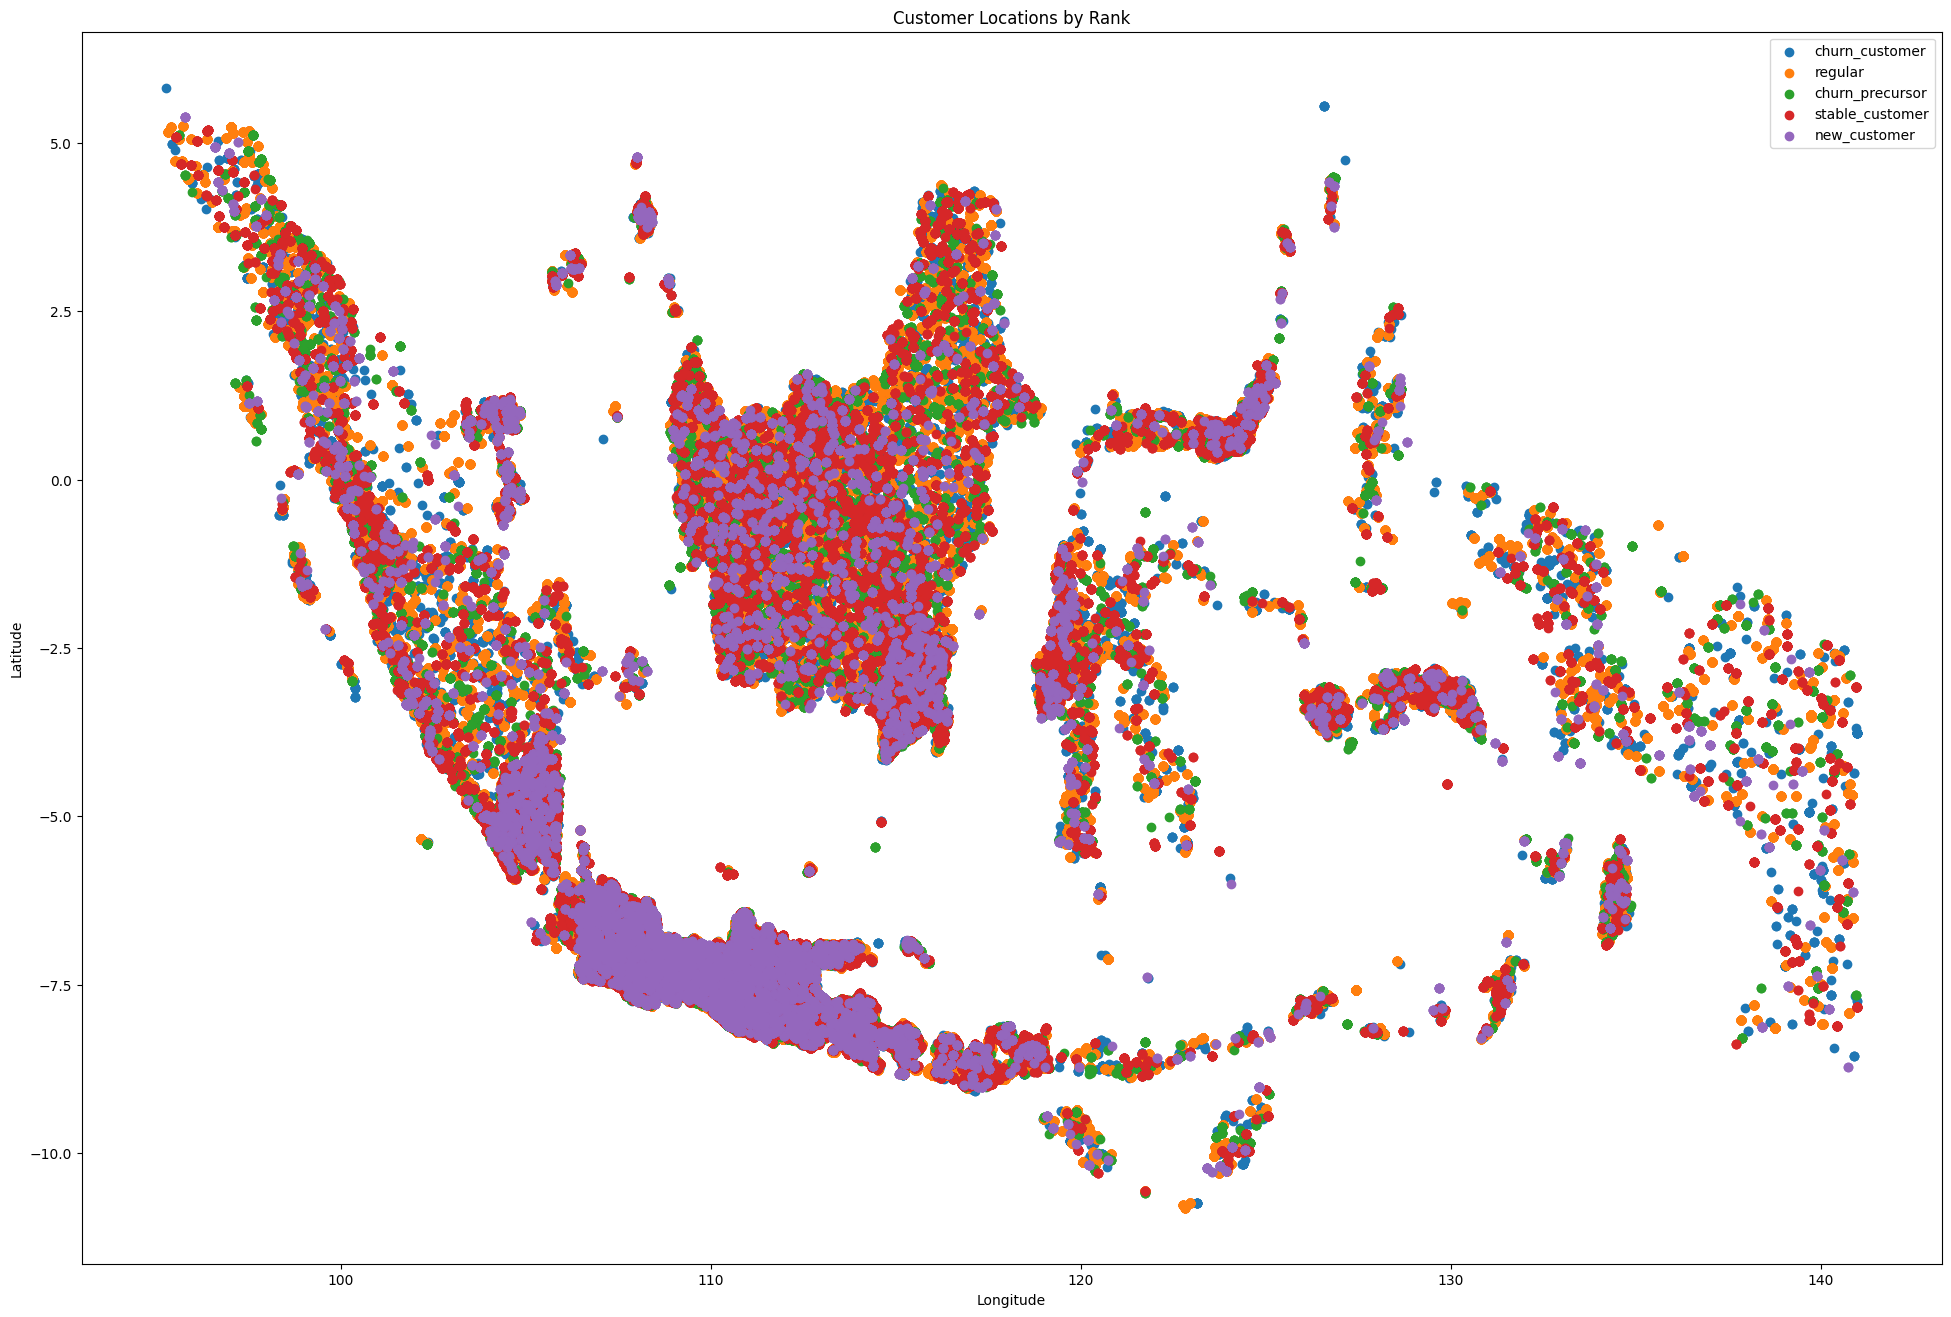

In [ ]:
plt.figure(figsize=(24, 16))
# 각 Rank 종류별로 순환하며 위치 시각화
for rank in df_ct_merged['Rank'].unique():
    rank_data = df_ct_merged[df_ct_merged['Rank'] == rank]

    plt.scatter(rank_data['home_location_long'], rank_data['home_location_lat'], label=rank)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Customer Locations by Rank')
plt.legend()
plt.show()

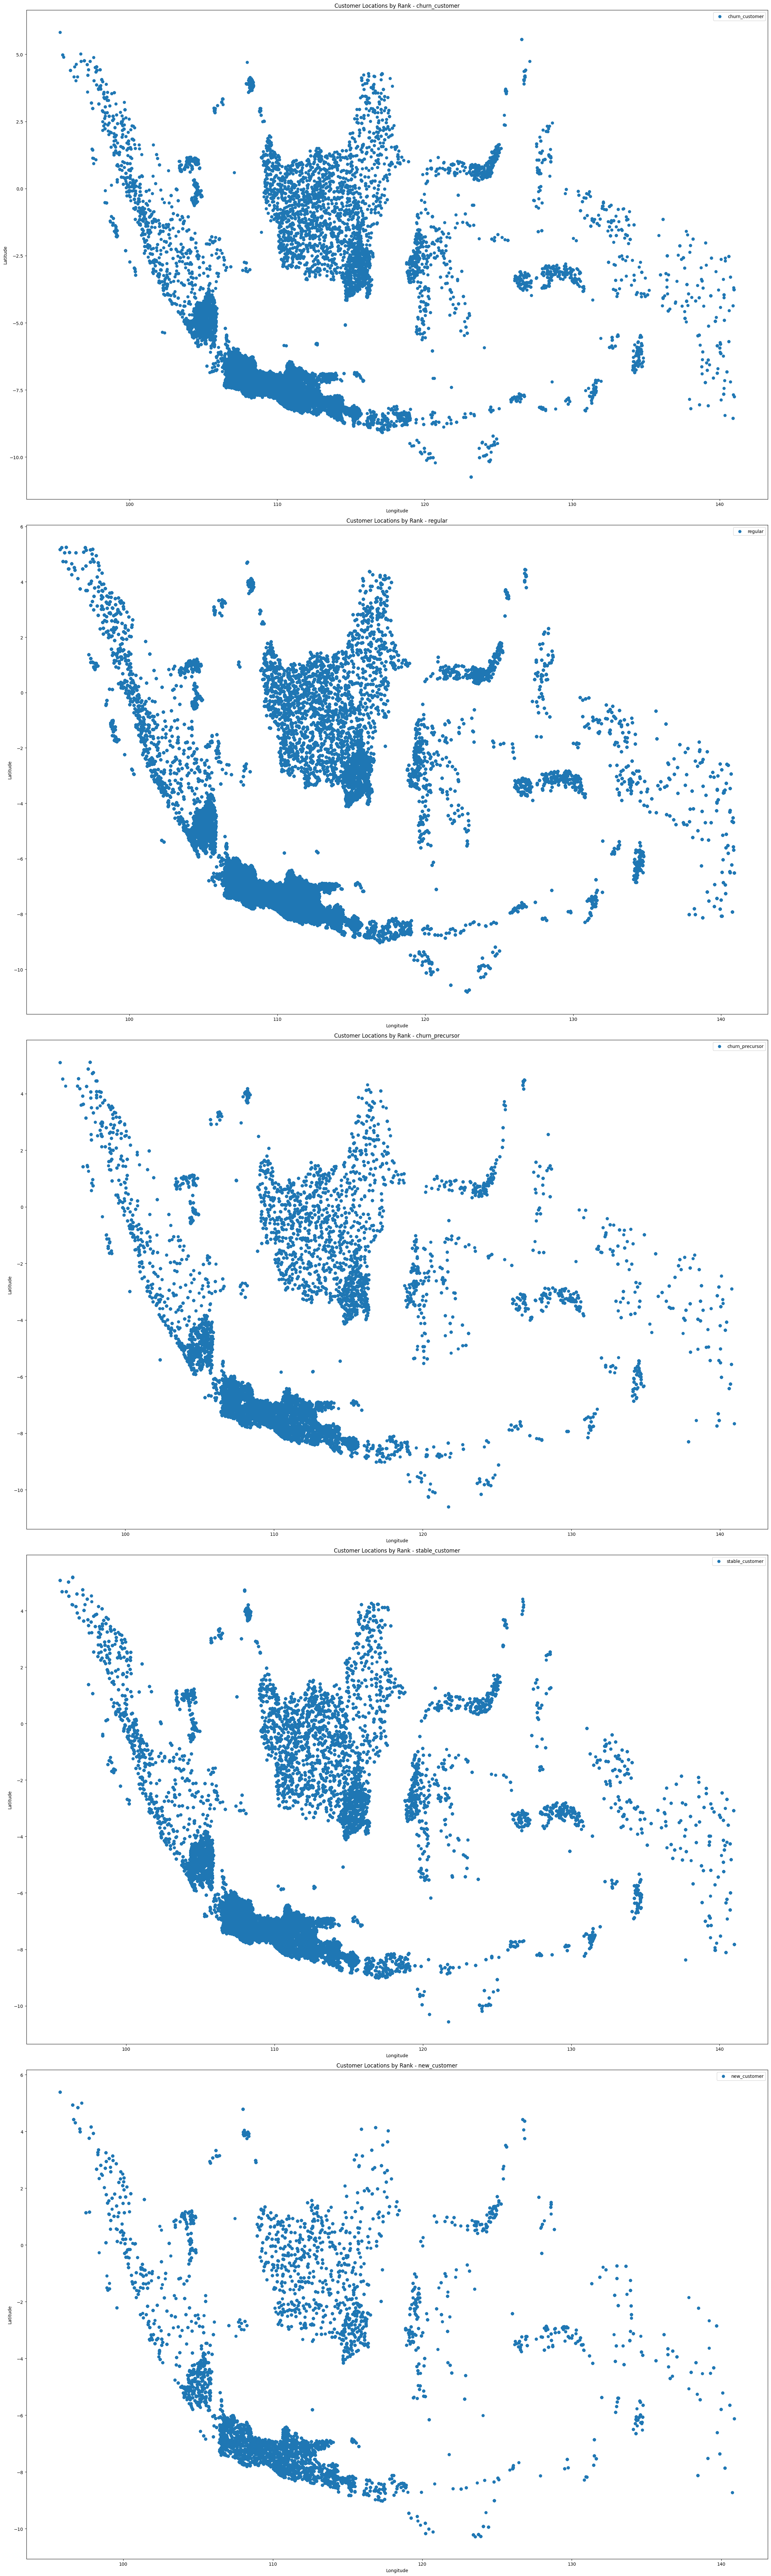

In [ ]:
# 고객 Rank 종류
rank_types = df_ct_merged['Rank'].unique()

# 각 Rank 종류별로 따로 시각화
fig, axes = plt.subplots(nrows=len(rank_types), figsize=(24, 16 * len(rank_types)))

for i, rank in enumerate(rank_types):
    rank_data = df_ct_merged[df_ct_merged['Rank'] == rank]

    ax = axes[i]
    ax.scatter(rank_data['home_location_long'], rank_data['home_location_lat'], label=rank)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Customer Locations by Rank - {rank}')
    ax.legend()

plt.tight_layout()
plt.show()

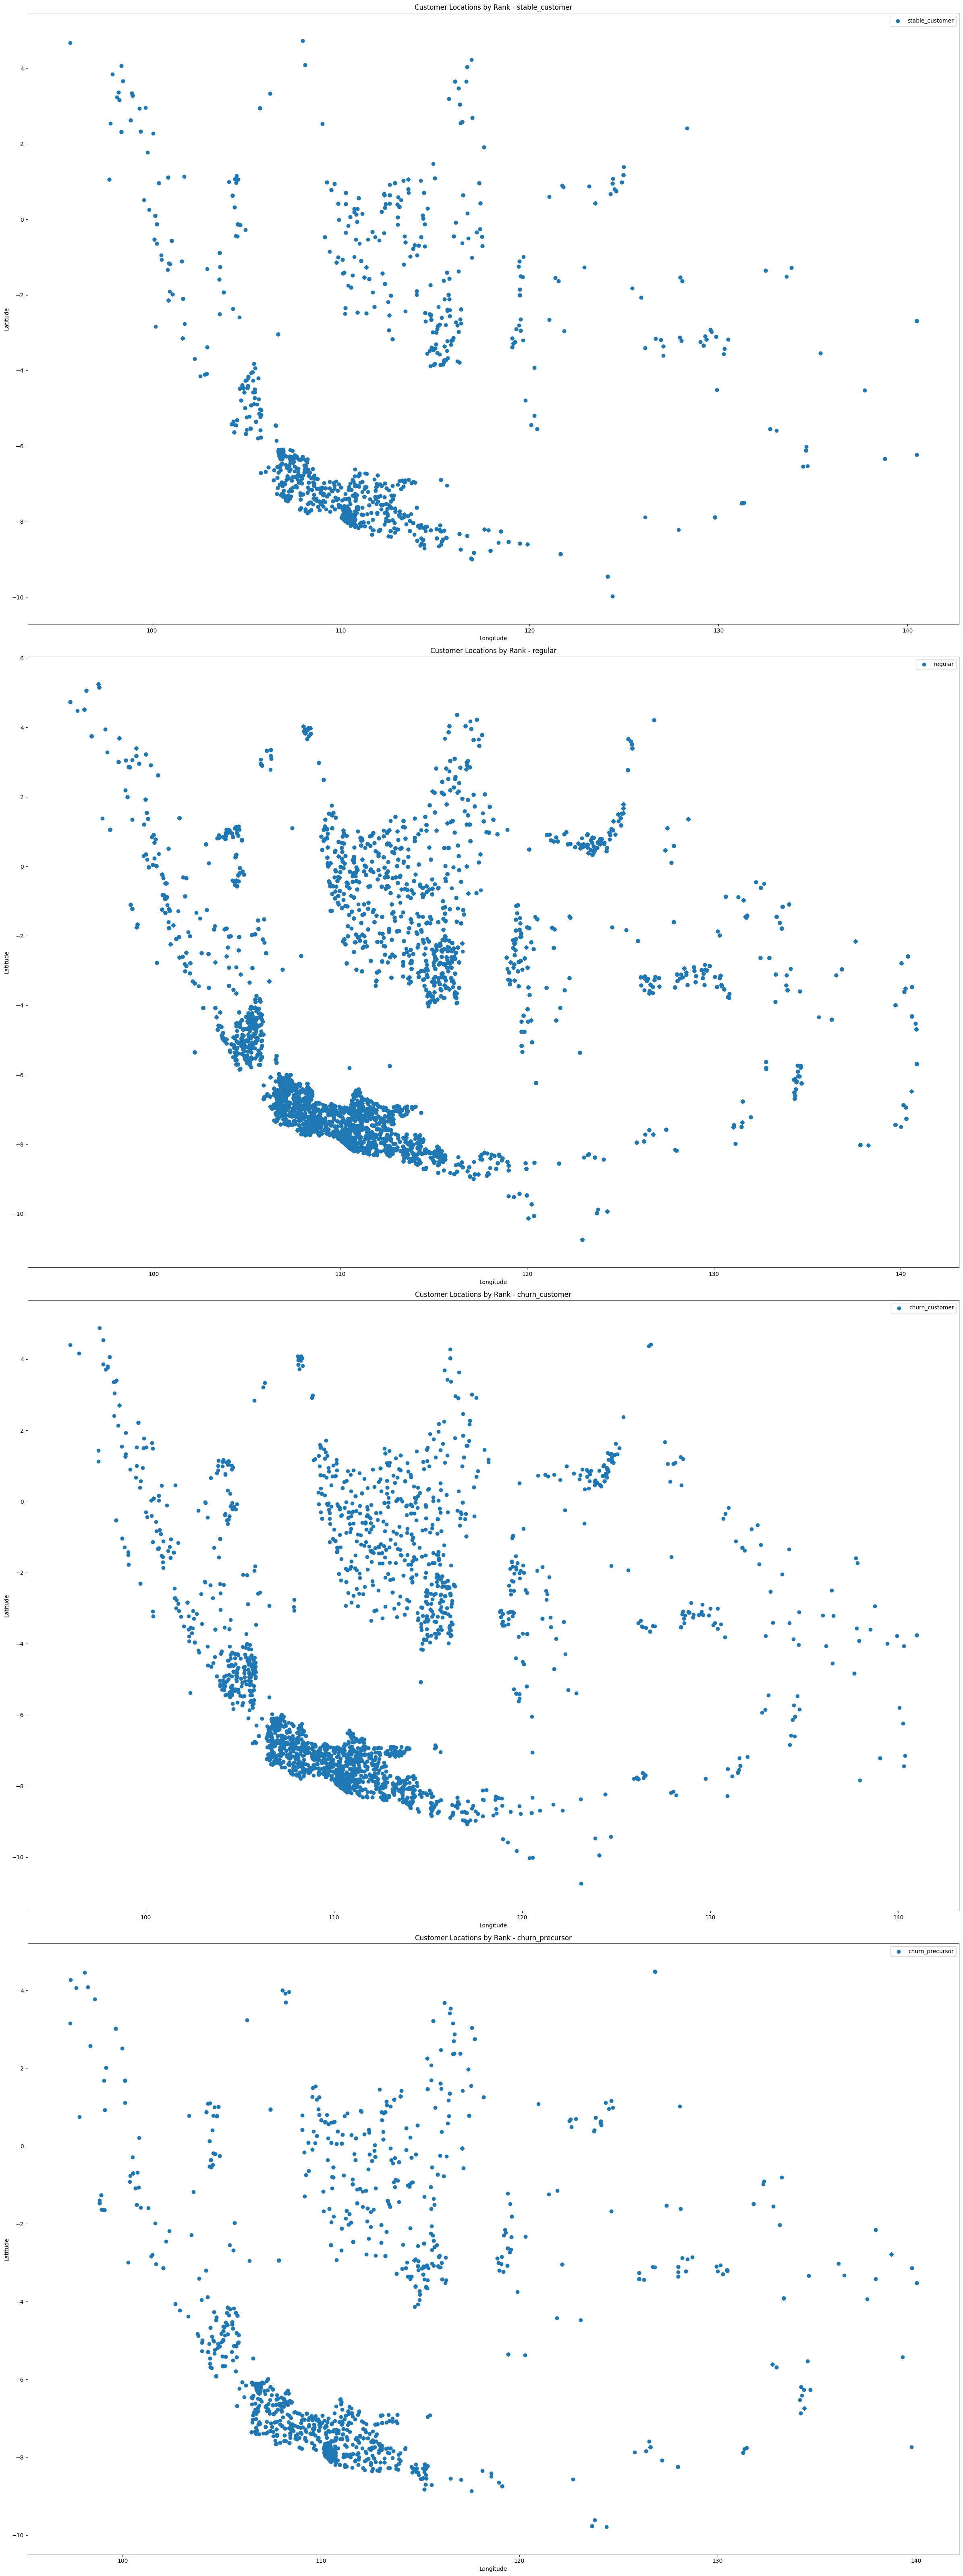

In [ ]:
df_2016 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2016]
df_2017 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2017]
df_2018 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2018]
df_2019 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2019]
df_2020 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2020]
df_2021 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2021]
df_2022 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2022]
# 고객 Rank 종류
rank_types = df_2017['Rank'].unique()

# 각 Rank 종류별로 따로 시각화
fig, axes = plt.subplots(nrows=len(rank_types), figsize=(24, 16 * len(rank_types)))

for i, rank in enumerate(rank_types):
    rank_data = df_2017[df_2017['Rank'] == rank]

    ax = axes[i]
    ax.scatter(rank_data['home_location_long'], rank_data['home_location_lat'], label=rank)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Customer Locations by Rank - {rank}')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Rank 별로 promo_code 사용 횟수를 계산
promo_code_counts = df_ct_merged.groupby(['Rank', 'promo_code'])['customer_id'].count().reset_index()

# Rank 별로 promo_code 사용 횟수를 내림차순으로 정렬
promo_code_counts_sorted = promo_code_counts.sort_values(by=['Rank', 'customer_id'], ascending=[True, False])

# 상위 5개만 선택
top_5_promo_codes_by_rank = promo_code_counts_sorted.groupby('Rank').head(5)

print(top_5_promo_codes_by_rank)

               Rank     promo_code  customer_id
6    churn_customer    WEEKENDSERU         3696
0    churn_customer         AZ2022         3535
1    churn_customer        BUYMORE         2601
7    churn_customer         XX2022         1733
5    churn_customer  WEEKENDMANTAP         1295
8   churn_precursor         AZ2022         5415
9   churn_precursor        BUYMORE         4302
14  churn_precursor    WEEKENDSERU         3998
15  churn_precursor         XX2022         2597
13  churn_precursor  WEEKENDMANTAP         1401
16     new_customer         AZ2022         1812
22     new_customer    WEEKENDSERU         1479
17     new_customer        BUYMORE         1364
23     new_customer         XX2022         1036
18     new_customer      LIBURDONG          461
24          regular         AZ2022       107608
25          regular        BUYMORE        80433
30          regular    WEEKENDSERU        72831
31          regular         XX2022        53746
26          regular      LIBURDONG      

In [ ]:
# Rank 별로 productDisplayName 구매 횟수를 계산
product_counts = df_ct_merged.groupby(['Rank', 'productDisplayName'])['customer_id'].count().reset_index()

# Rank 별로 productDisplayName 구매 횟수를 내림차순으로 정렬
product_counts_sorted = product_counts.sort_values(by=['Rank', 'customer_id'], ascending=[True, False])

# 상위 5개만 선택
top_5_products_by_rank = product_counts_sorted.groupby('Rank').head(5)

print(top_5_products_by_rank)

                   Rank             productDisplayName  customer_id
9866     churn_customer   Lucera Women Silver Earrings           65
9867     churn_customer    Lucera Women Silver Pendant           48
5386     churn_customer  Fastrack Men Black Dial Watch           41
9869     churn_customer       Lucera Women Silver Ring           40
3099     churn_customer      Catwalk Women Black Heels           38
30520   churn_precursor   Lucera Women Silver Earrings           73
30523   churn_precursor    Lucera Women Silver Pendant           70
30525   churn_precursor       Lucera Women Silver Ring           62
30793   churn_precursor    Maxima Men White Dial Watch           57
22523   churn_precursor      Catwalk Women Black Heels           52
49355      new_customer   Lucera Women Silver Earrings           43
49577      new_customer    Maxima Men White Dial Watch           36
49356      new_customer    Lucera Women Silver Pendant           32
49358      new_customer       Lucera Women Silve

여성 귀걸이 팬던트 반지

하이힐

남성 시계


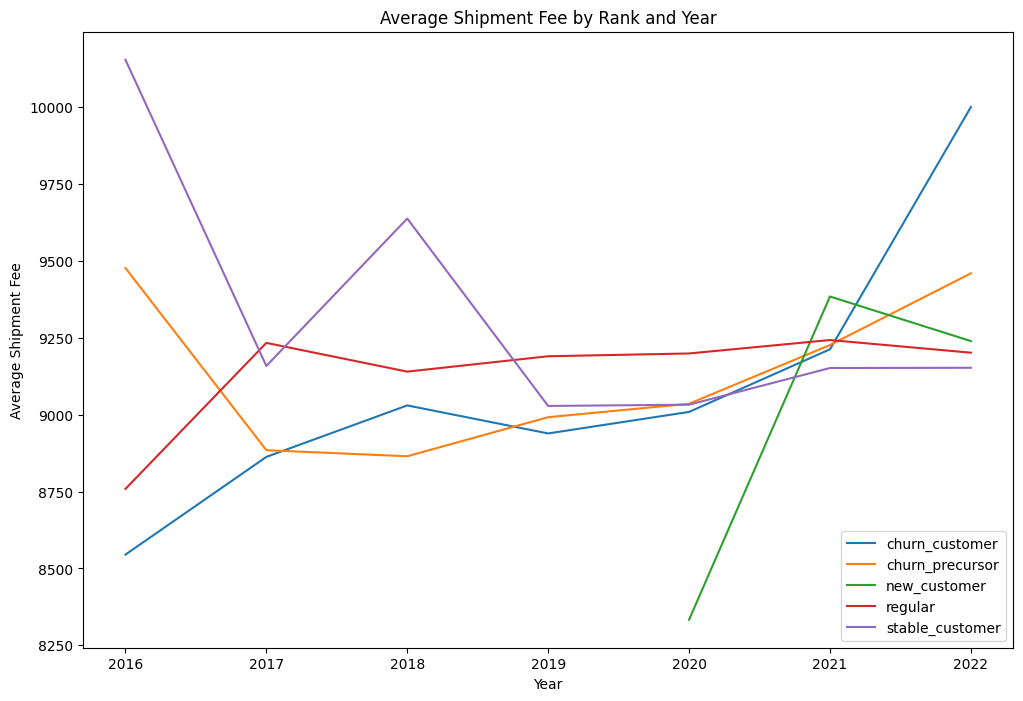

In [ ]:
# Rank 별 shipment_fee 배송비용의 연도별 평균 계산
shipment_fee_avg_by_rank = df_ct_merged.groupby(['Rank', df_ct_merged['order_date'].dt.year])['shipment_fee'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=shipment_fee_avg_by_rank, x='order_date', y='shipment_fee', hue='Rank')
plt.title('Average Shipment Fee by Rank and Year')
plt.xlabel('Year')
plt.ylabel('Average Shipment Fee')
plt.legend()
plt.show()

In [ ]:
df_2016 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2016]
df_2017 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2017]
df_2018 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2018]
df_2019 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2019]
df_2020 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2020]
df_2021 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2021]
df_2022 = df_ct_merged[df_ct_merged['order_date'].dt.year == 2022]

In [ ]:
# 고객 Rank 종류
rank_types = df_ct_merged['Rank'].unique()

# 각 Rank 종류별로 따로 시각화
fig, axes = plt.subplots(nrows=len(rank_types), figsize=(24, 16 * len(rank_types)))

for i, rank in enumerate(rank_types):
    rank_data = df_ct_merged[df_ct_merged['Rank'] == rank]

    ax = axes[i]
    ax.scatter(rank_data['shipment_location_long'], rank_data['shipment_location_lat'], label=rank)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Shipment Locations by Rank - {rank}')
    ax.legend()

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

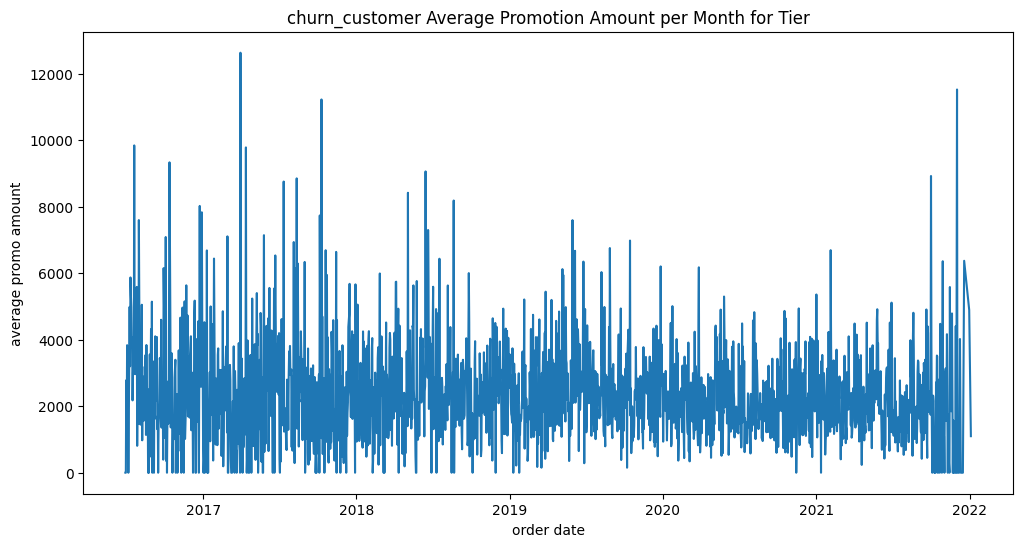

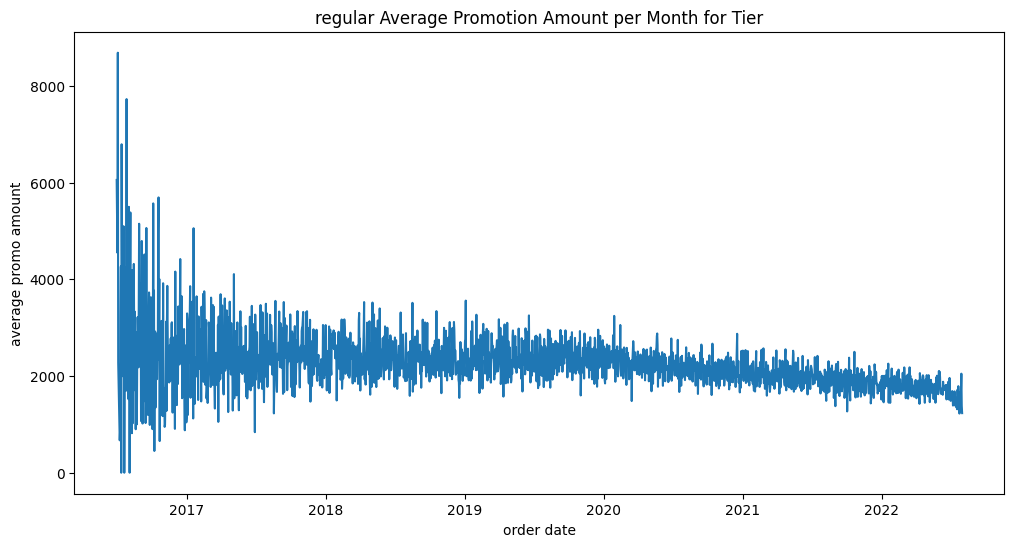

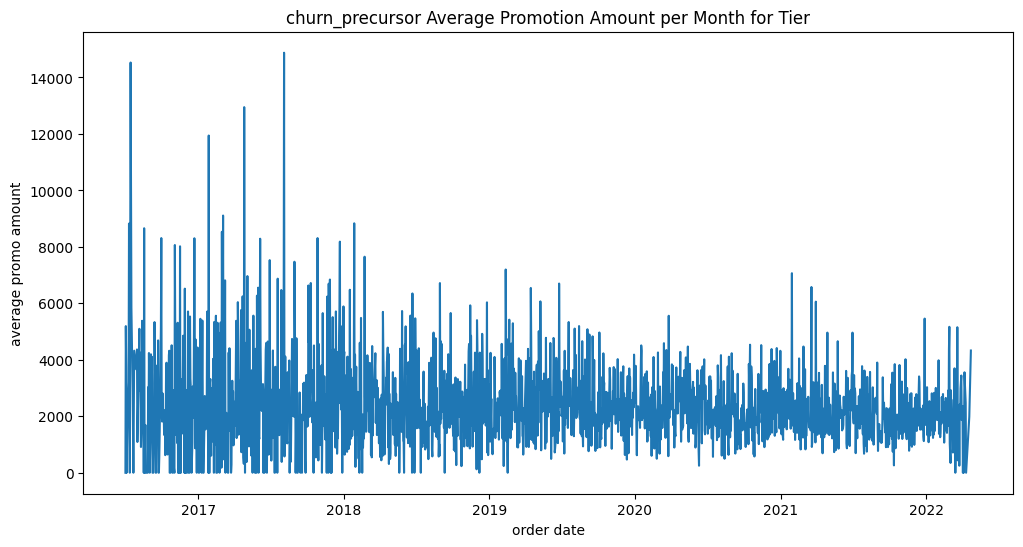

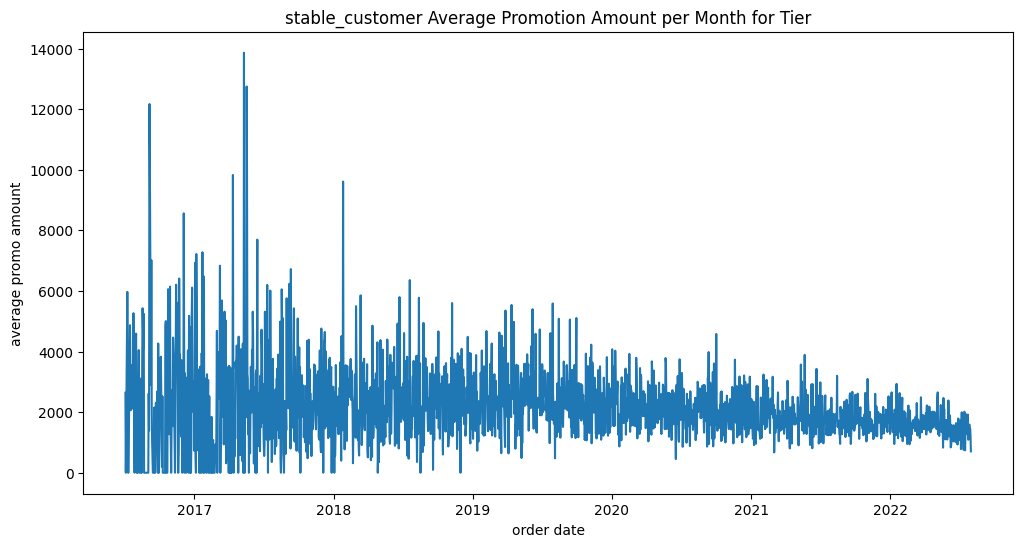

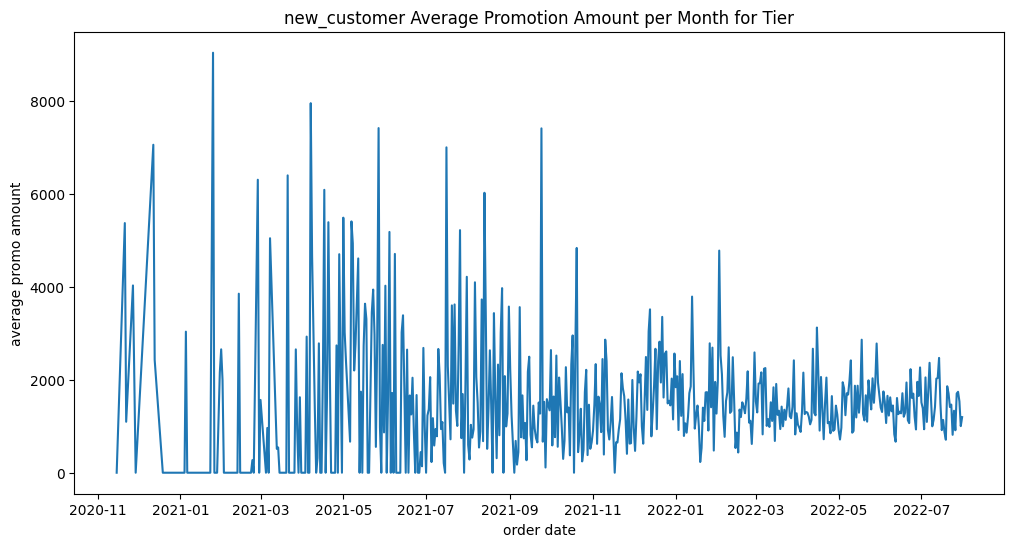

In [ ]:
# 등급별로 시각화
rank_types = df_ct_merged['Rank'].unique()

for rank in rank_types:
    rank_data = df_ct_merged[df_ct_merged['Rank'] == rank]

    # Rank 별로 월별 promo_amount 평균 계산
    promo_amount_avg_by_rank = rank_data.groupby(['order_date'])['promo_amount'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=promo_amount_avg_by_rank, x='order_date', y='promo_amount')
    plt.title(f'{rank} Average Promotion Amount per Month for Tier')
    plt.xlabel('order date')
    plt.ylabel('average promo amount')
    plt.show()

In [ ]:
# Rank 종류
rank_types = df_ct_merged['Rank'].unique()

for rank in rank_types:
    rank_data = df_ct_merged[df_ct_merged['Rank'] == rank]

    # 중복되지 않는 고객의 수 계산
    unique_customers_count = rank_data['customer_id'].nunique()

    # first_join_date와 order_date이 같은 고객의 수 계산
    same_date_customers = rank_data[rank_data['first_join_date'] == rank_data['order_date']]['customer_id'].nunique()

    # 비율 계산
    same_date_ratio = same_date_customers / unique_customers_count * 100

    print(f'{rank} 등급의 중복되지 않는 고객 수: {unique_customers_count}')
    print(f'{rank} 등급의 first_join_date와 order_date이 같은 횟수: {same_date_customers}')
    print(f'{rank} 등급의 first_join_date와 order_date이 같은 고객 비율: {same_date_ratio:.2f}%')

churn_customer 등급의 중복되지 않는 고객 수: 13354
churn_customer 등급의 first_join_date와 order_date이 같은 횟수: 6194
churn_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 46.38%
regular 등급의 중복되지 않는 고객 수: 14436
regular 등급의 first_join_date와 order_date이 같은 횟수: 6689
regular 등급의 first_join_date와 order_date이 같은 고객 비율: 46.34%
churn_precursor 등급의 중복되지 않는 고객 수: 7561
churn_precursor 등급의 first_join_date와 order_date이 같은 횟수: 3420
churn_precursor 등급의 first_join_date와 order_date이 같은 고객 비율: 45.23%
stable_customer 등급의 중복되지 않는 고객 수: 10892
stable_customer 등급의 first_join_date와 order_date이 같은 횟수: 5034
stable_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 46.22%
new_customer 등급의 중복되지 않는 고객 수: 4457
new_customer 등급의 first_join_date와 order_date이 같은 횟수: 2089
new_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 46.87%


In [ ]:
# Rank 종류
rank_types = df_ct_merged['Rank'].unique()

for year in range(2016, 2023):
    print(f'--- {year}년 ---')
    for rank in rank_types:
        rank_data = df_ct_merged[(df_ct_merged['Rank'] == rank) & (df_ct_merged['order_date'].dt.year == year)]

        # 중복되지 않는 고객의 수 계산
        unique_customers_count = rank_data['customer_id'].nunique()

        # 해당 연도와 Rank에 데이터가 없으면 건너뛰기
        if unique_customers_count == 0:
            continue

        # first_join_date와 order_date이 같은 고객의 수 계산
        same_date_customers = rank_data[rank_data['first_join_date'] == rank_data['order_date']]['customer_id'].nunique()

        # 비율 계산
        same_date_ratio = same_date_customers / unique_customers_count * 100

        print(f'{rank} 등급의 중복되지 않는 고객 수: {unique_customers_count}')
        print(f'{rank} 등급의 first_join_date와 order_date이 같은 횟수: {same_date_customers}')
        print(f'{rank} 등급의 first_join_date와 order_date이 같은 고객 비율: {same_date_ratio:.2f}%')


--- 2016년 ---
churn_customer 등급의 중복되지 않는 고객 수: 1066
churn_customer 등급의 first_join_date와 order_date이 같은 횟수: 505
churn_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 47.37%
regular 등급의 중복되지 않는 고객 수: 876
regular 등급의 first_join_date와 order_date이 같은 횟수: 414
regular 등급의 first_join_date와 order_date이 같은 고객 비율: 47.26%
churn_precursor 등급의 중복되지 않는 고객 수: 319
churn_precursor 등급의 first_join_date와 order_date이 같은 횟수: 138
churn_precursor 등급의 first_join_date와 order_date이 같은 고객 비율: 43.26%
stable_customer 등급의 중복되지 않는 고객 수: 227
stable_customer 등급의 first_join_date와 order_date이 같은 횟수: 92
stable_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 40.53%
--- 2017년 ---
churn_customer 등급의 중복되지 않는 고객 수: 2766
churn_customer 등급의 first_join_date와 order_date이 같은 횟수: 1211
churn_customer 등급의 first_join_date와 order_date이 같은 고객 비율: 43.78%
regular 등급의 중복되지 않는 고객 수: 3170
regular 등급의 first_join_date와 order_date이 같은 횟수: 1090
regular 등급의 first_join_date와 order_date이 같은 고객 비율: 34.38%
churn_precursor 등급의 중복되지 않는 고객 수: 1208

In [ ]:
for year in range(2016, 2023):
    print(f'--- {year}년 ---')
    year_data = df_ct_merged[df_ct_merged['order_date'].dt.year == year]

    # 중복되지 않는 고객의 수 계산
    unique_customers_count = year_data['customer_id'].nunique()

    # 해당 연도에 데이터가 없으면 건너뛰기
    if unique_customers_count == 0:
        continue

    # first_join_date와 order_date이 같은 고객의 수 계산
    same_date_customers = year_data[year_data['first_join_date'] == year_data['order_date']]['customer_id'].nunique()

    # 비율 계산
    same_date_ratio = same_date_customers / unique_customers_count * 100

    print(f'{year}년의 중복되지 않는 고객 수: {unique_customers_count}')
    print(f'{year}년의 first_join_date와 order_date이 같은 횟수: {same_date_customers}')
    print(f'{year}년의 first_join_date와 order_date이 같은 고객 비율: {same_date_ratio:.2f}%')


--- 2016년 ---
2016년의 중복되지 않는 고객 수: 2488
2016년의 first_join_date와 order_date이 같은 횟수: 1149
2016년의 first_join_date와 order_date이 같은 고객 비율: 46.18%
--- 2017년 ---
2017년의 중복되지 않는 고객 수: 8175
2017년의 first_join_date와 order_date이 같은 횟수: 3064
2017년의 first_join_date와 order_date이 같은 고객 비율: 37.48%
--- 2018년 ---
2018년의 중복되지 않는 고객 수: 13894
2018년의 first_join_date와 order_date이 같은 횟수: 3355
2018년의 first_join_date와 order_date이 같은 고객 비율: 24.15%
--- 2019년 ---
2019년의 중복되지 않는 고객 수: 20449
2019년의 first_join_date와 order_date이 같은 횟수: 3803
2019년의 first_join_date와 order_date이 같은 고객 비율: 18.60%
--- 2020년 ---
2020년의 중복되지 않는 고객 수: 28161
2020년의 first_join_date와 order_date이 같은 횟수: 4340
2020년의 first_join_date와 order_date이 같은 고객 비율: 15.41%
--- 2021년 ---
2021년의 중복되지 않는 고객 수: 36515
2021년의 first_join_date와 order_date이 같은 횟수: 4962
2021년의 first_join_date와 order_date이 같은 고객 비율: 13.59%
--- 2022년 ---
2022년의 중복되지 않는 고객 수: 32825
2022년의 first_join_date와 order_date이 같은 횟수: 2753
2022년의 first_join_date와 order_date이 같은 고객 비율: 8.39%


In [ ]:
df_ct_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253966 entries, 0 to 1253965
Data columns (total 49 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   created_at              1253966 non-null  datetime64[ns, UTC]
 1   customer_id             1253966 non-null  int64              
 2   booking_id              1253966 non-null  object             
 3   session_id              1253966 non-null  object             
 4   payment_method          1253966 non-null  object             
 5   payment_status          1253966 non-null  object             
 6   promo_amount            1253966 non-null  int64              
 7   promo_code              480908 non-null   object             
 8   shipment_fee            1253966 non-null  int64              
 9   shipment_date_limit     1253966 non-null  object             
 10  shipment_location_lat   1253966 non-null  float64            
 11  shipment_lo